In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np # For np.nan and general numerical operations
import geopandas
from shapely.geometry import Point

# Load the CSV data
df = pd.read_csv("grow_attributes.csv", delimiter=';', low_memory=False)

# Extract starting and ending years for time-based analysis
df['starting_year'] = pd.to_datetime(df['starting_date']).dt.year
df['ending_year'] = pd.to_datetime(df['ending_date']).dt.year

# Define filter criteria for later use
df['over_30_years'] = df['length_years'] >= 30
df['gap_free'] = df['gap_fraction'] == 0.0
df['monthly'] = df['interval'] == 'MS'
df['ends_2023_or_later'] = df['ending_year'] >= 2023

# Define the path to your downloaded world map shapefile
# IMPORTANT: Replace this with the actual path to your 'ne_110m_admin_0_countries.shp' file
# Example: r"C:\Users\YourUser\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp"
world_map_filepath = r"C:\Users\tarik\Desktop\Maps" # Ensure this points directly to the .shp file

print("Libraries loaded and data initialized.")

Libraries loaded and data initialized.


## Global Data Overview

This section provides an initial overview of the entire dataset, showing the global distribution of monitoring stations and various attribute summaries across countries.

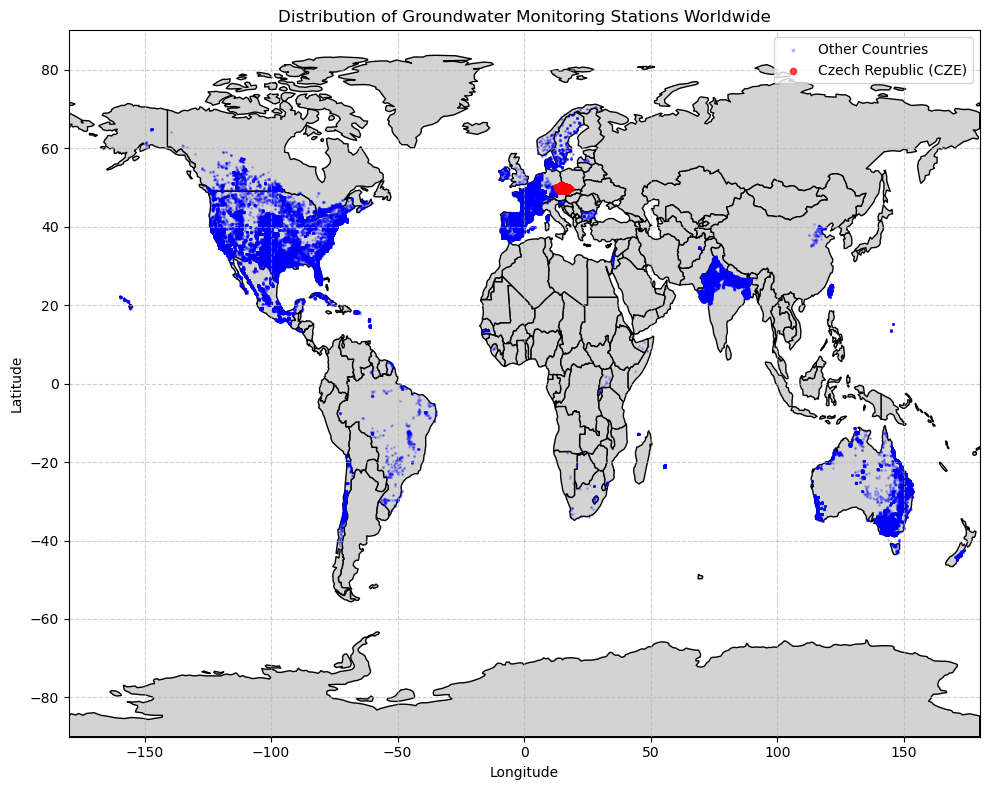

In [2]:
# Global Scatterplot of monitoring stations on a world map using geopandas
# This plot visualizes the geographic distribution of all groundwater monitoring stations, with Czech Republic stations highlighted.
if {'latitude', 'longitude'}.issubset(df.columns):
    # Create a GeoDataFrame from your DataFrame
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326") # WGS84 coordinate system

    # Load the world map dataset from the local file
    try:
        world = geopandas.read_file(world_map_filepath)
    except Exception as e:
        print(f"Error loading world map shapefile: {e}")
        print(f"Please ensure '{world_map_filepath}' is the correct path to your downloaded 'ne_110m_admin_0_countries.shp' file and all its associated files (.shx, .dbf, etc.) are in the same directory.")
        world = None # Set world to None to skip plotting if map cannot be loaded

    if world is not None:
        # Separate Czech Republic data from the rest for distinct coloring
        gdf_cz = gdf[gdf["country"] == "CZE"]
        gdf_other = gdf[gdf["country"] != "CZE"]

        # Create the plot
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))

        # Plot the world map
        world.plot(ax=ax, color='lightgrey', edgecolor='black')

        # Plot non-Czech Republic stations
        gdf_other.plot(ax=ax, marker='o', color='blue', markersize=1, alpha=0.2, label='Other Countries')

        # Plot Czech Republic stations on top
        gdf_cz.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='Czech Republic (CZE)')

        ax.set_title("Distribution of Groundwater Monitoring Stations Worldwide")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

        # Set approximate world map limits
        ax.set_xlim([-180, 180])
        ax.set_ylim([-90, 90])

        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(markerscale=2)
        plt.tight_layout()
        plt.show()
    else:
        print("World map plot skipped due to shapefile loading error.")
else:
    print("Columns 'latitude' and 'longitude' not found. Skipping world map plot.")

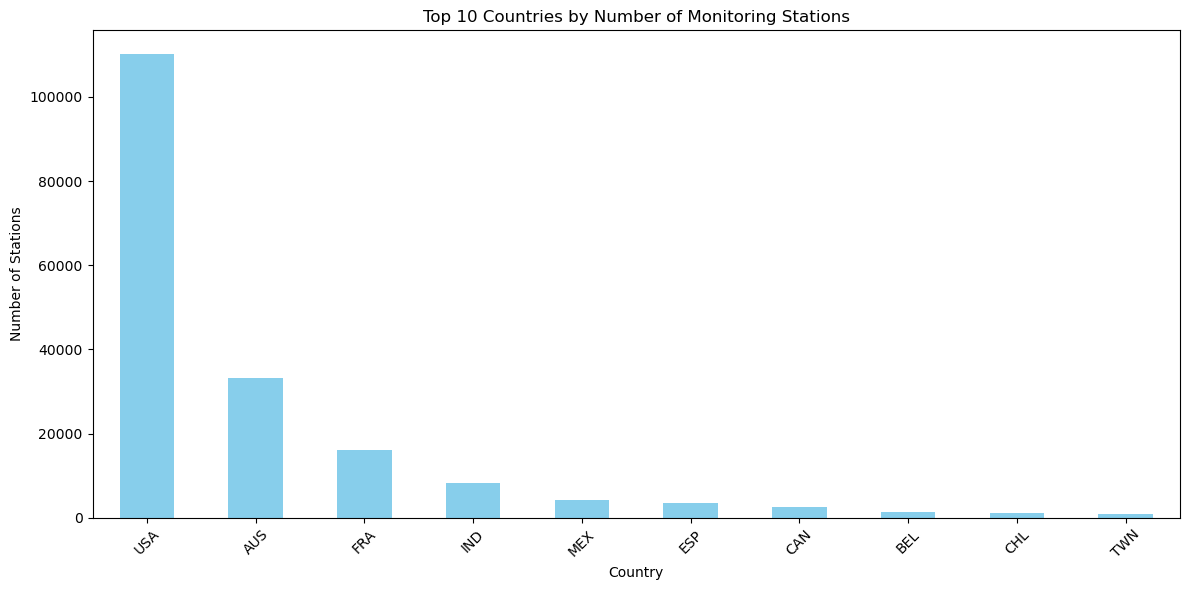

In [3]:
# Bar plot of the top 10 countries with the most monitoring stations
# This plot highlights the countries with the largest number of groundwater monitoring points in the dataset.
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Number of Monitoring Stations")
plt.xlabel("Country")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

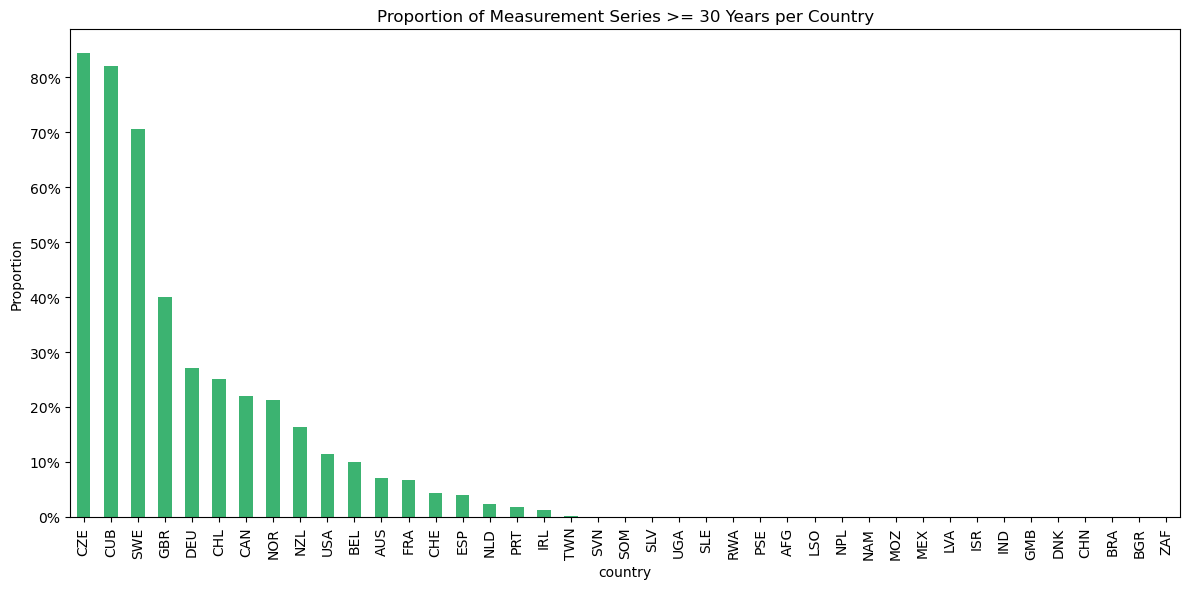

In [4]:
# Bar plot showing the proportion of measurement series >= 30 years per country
# This plot indicates which countries have a higher percentage of long-term groundwater monitoring series.
plt.figure(figsize=(12, 6))
ax = df.groupby('country')['over_30_years'].mean().sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')
plt.title("Proportion of Measurement Series >= 30 Years per Country")
plt.ylabel("Proportion")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

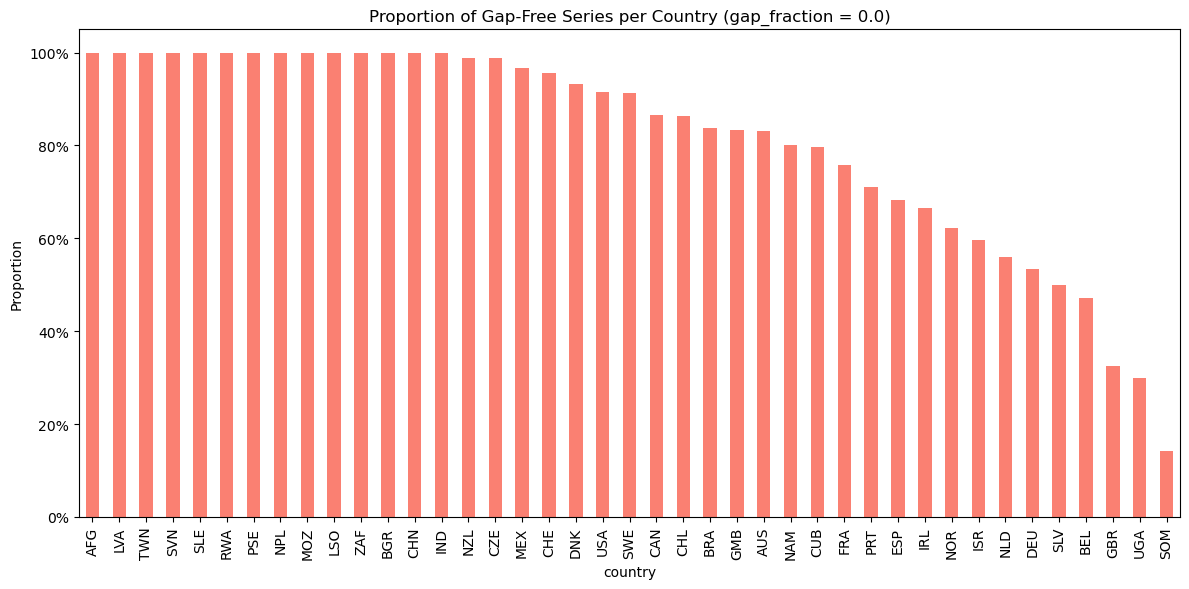

In [5]:
# Bar plot showing the proportion of gap-free series per country (gap_fraction = 0.0)
# This plot identifies countries with a higher proportion of complete (gap-free) groundwater measurement records.
plt.figure(figsize=(12, 6))
ax = df.groupby('country')['gap_free'].mean().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Proportion of Gap-Free Series per Country (gap_fraction = 0.0)")
plt.ylabel("Proportion")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

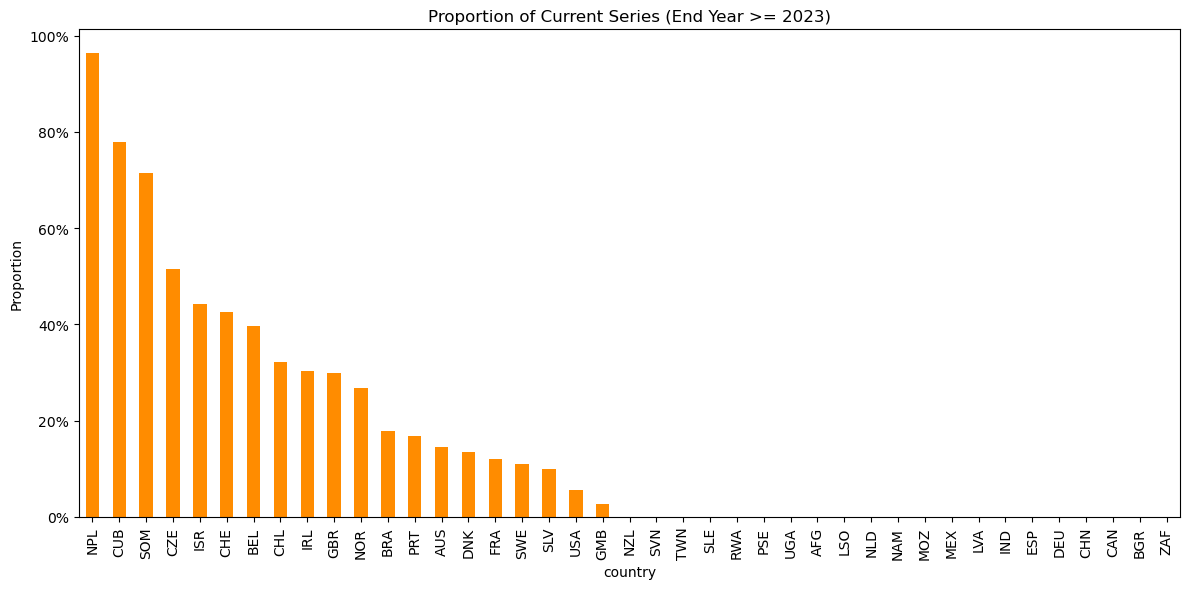

In [6]:
# Bar plot showing the proportion of current series (ending year >= 2023) per country
# This plot highlights countries with more up-to-date groundwater monitoring data.
plt.figure(figsize=(12, 6))
ax = df.groupby('country')['ends_2023_or_later'].mean().sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title("Proportion of Current Series (End Year >= 2023)")
plt.ylabel("Proportion")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

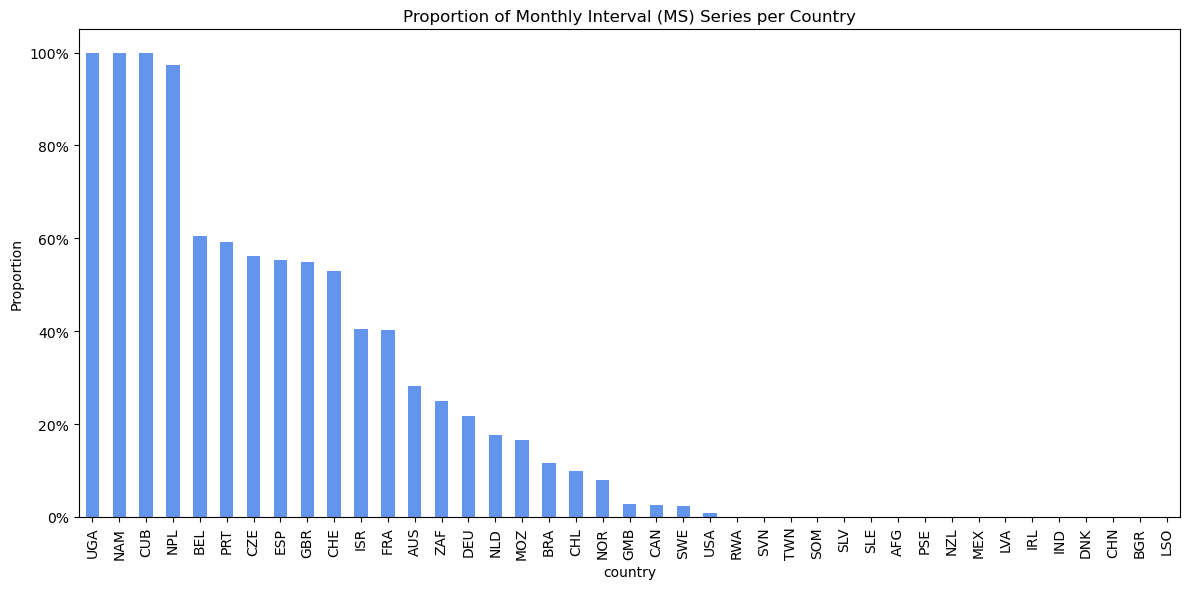

In [7]:
# Bar plot showing the proportion of monthly interval (MS) series per country
# This plot shows the prevalence of monthly measurement intervals across different countries.
plt.figure(figsize=(12, 6))
ax = df.groupby('country')['monthly'].mean().sort_values(ascending=False).plot(kind='bar', color='cornflowerblue')
plt.title("Proportion of Monthly Interval (MS) Series per Country")
plt.ylabel("Proportion")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\tarik\AppData\Local\Temp\ipykernel_20104\3023759050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')


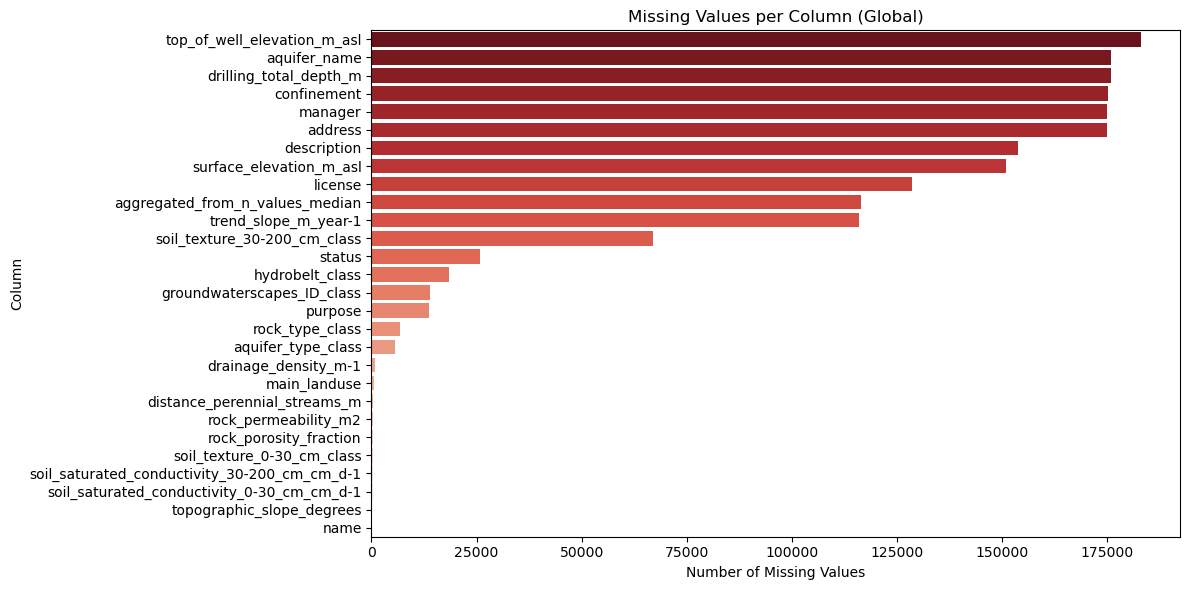

In [8]:
# Bar plot showing missing values per column across the entire dataset
# This plot helps to identify which columns have missing data and to what extent.
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(12,6))
    sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
    plt.title("Missing Values per Column (Global)")
    plt.xlabel("Number of Missing Values")
    plt.ylabel("Column")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

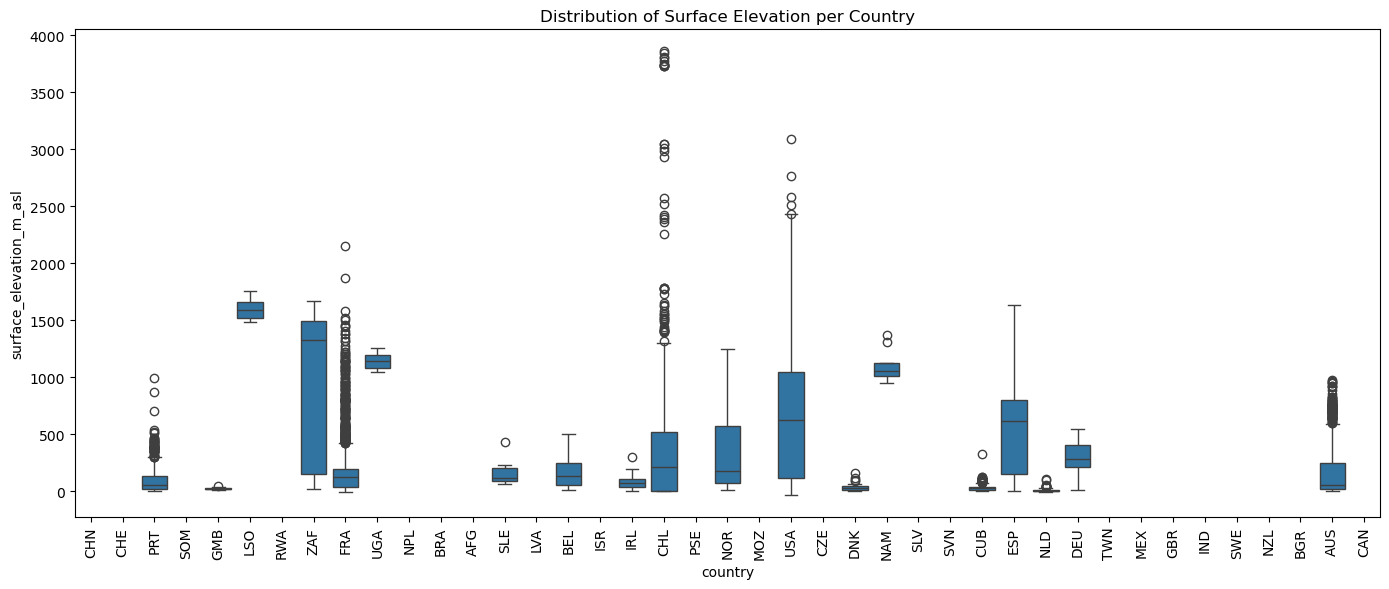

In [9]:
# Box plot showing the distribution of surface elevation per country
# This plot visualizes the range and median of station elevations for each country, helping to identify outliers.
if 'surface_elevation_m_asl' in df.columns:
    plt.figure(figsize=(14,6))
    sns.boxplot(x="country", y="surface_elevation_m_asl", data=df)
    plt.title("Distribution of Surface Elevation per Country")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'surface_elevation_m_asl' not found. Skipping elevation box plot.")

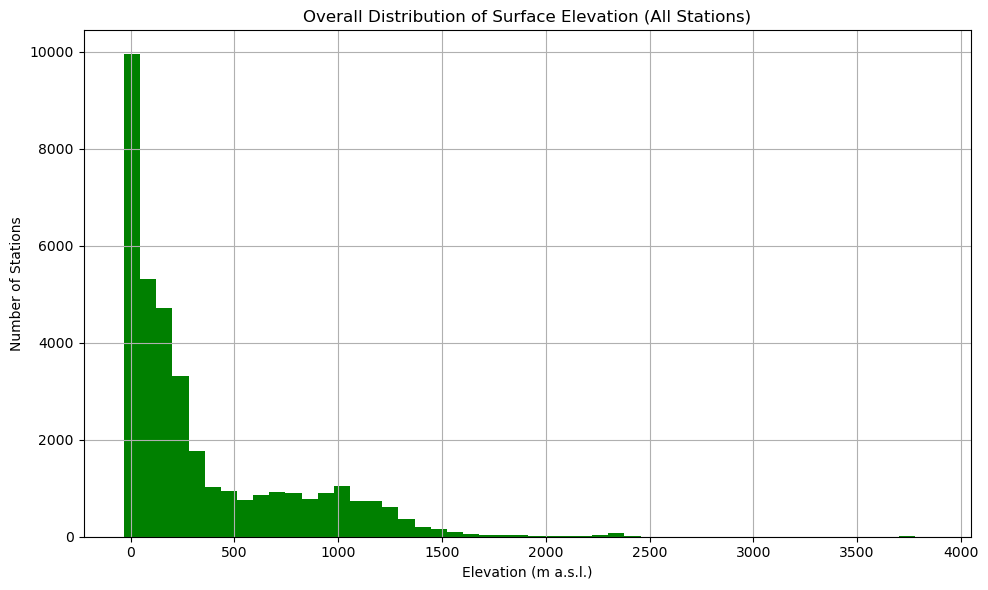

In [10]:
# Histogram showing the overall distribution of surface elevation for all monitoring stations
# Provides a general understanding of the altitude at which monitoring stations are located.
if 'surface_elevation_m_asl' in df.columns:
    plt.figure(figsize=(10,6))
    df['surface_elevation_m_asl'].dropna().hist(bins=50, color='green')
    plt.title("Overall Distribution of Surface Elevation (All Stations)")
    plt.xlabel("Elevation (m a.s.l.)")
    plt.ylabel("Number of Stations")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'surface_elevation_m_asl' not found. Skipping elevation histogram.")

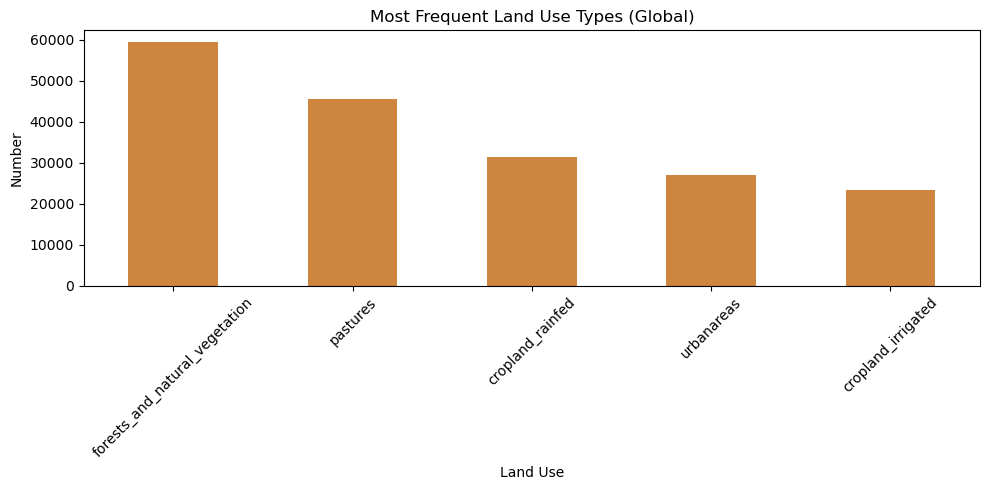

In [11]:
# Bar plot showing the most frequent land use types globally
# This plot illustrates the dominant land use categories associated with groundwater monitoring stations worldwide.
if 'main_landuse' in df.columns:
    plt.figure(figsize=(10,5))
    df['main_landuse'].value_counts().head(10).plot(kind='bar', color='peru')
    plt.title("Most Frequent Land Use Types (Global)")
    plt.xlabel("Land Use")
    plt.ylabel("Number")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'main_landuse' not found. Skipping land use bar plot.")

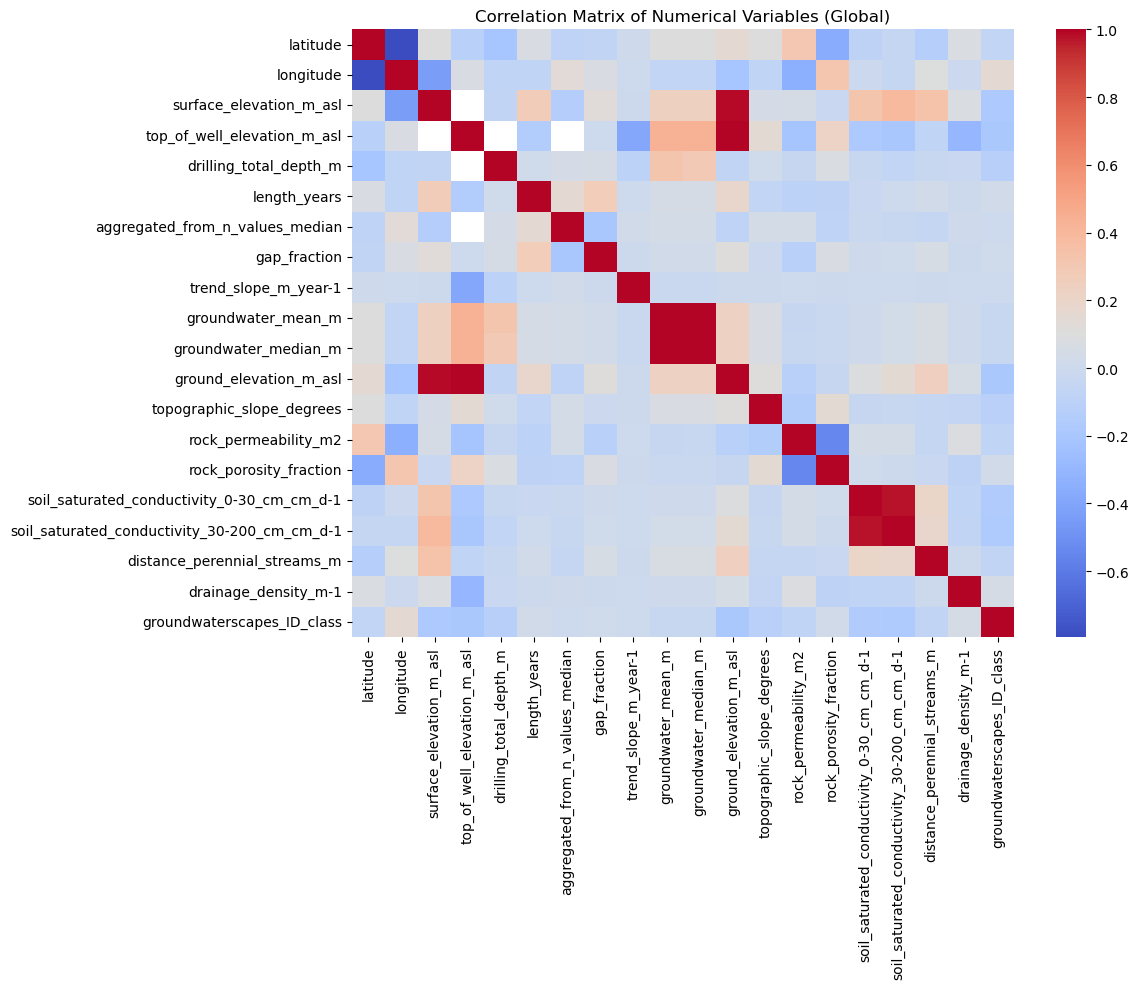

In [12]:
# Heatmap showing the correlation matrix of numerical variables across the entire dataset
# This heatmap visualizes the linear relationships between different numerical attributes in the dataset.
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty and len(numeric_df.columns) > 1:
    corr = numeric_df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix of Numerical Variables (Global)")
    plt.tight_layout()
    plt.show()
elif len(numeric_df.columns) <= 1:
    print("Not enough numerical columns for a correlation matrix (at least 2 needed). Skipping plot.")
else:
    print("No numerical columns found for a correlation matrix. Skipping plot.")

## Czech Republic (CZE) Specific Analysis

This section focuses specifically on the groundwater monitoring stations located in the Czech Republic (CZE), providing a more detailed look at their characteristics.

Number of monitoring stations in the Czech Republic (CZE): 669


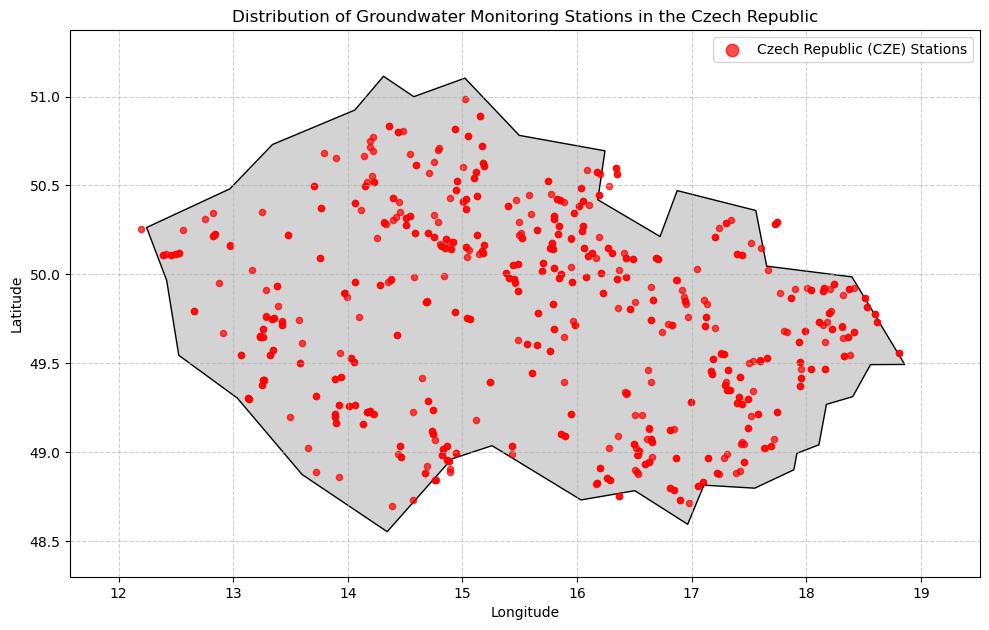

In [13]:
# Filter data for only the Czech Republic
df_cz = df[df["country"] == "CZE"].copy()

if df_cz.empty:
    raise ValueError("No data found for Czech Republic (CZE). Please check the input file and country code.")

print(f"Number of monitoring stations in the Czech Republic (CZE): {len(df_cz)}")

# Focused map of monitoring stations in the Czech Republic using geopandas
# This map provides a detailed view of the distribution of stations within the Czech Republic.
if {'latitude', 'longitude'}.issubset(df_cz.columns):
    # Create a GeoDataFrame for CZE data
    geometry_cz = [Point(xy) for xy in zip(df_cz['longitude'], df_cz['latitude'])]
    gdf_cz_map = geopandas.GeoDataFrame(df_cz, geometry=geometry_cz, crs="EPSG:4326")

    # Load the world map (and filter for CZE bounds to draw background) - or just load CZE country boundary if available
    try:
        world = geopandas.read_file(world_map_filepath)
        # Filter world map to just Czech Republic for background
        cz_boundary = world[world['ADM0_A3'] == 'CZE'] # 'ADM0_A3' is typically the 3-letter country code in Natural Earth
        if cz_boundary.empty:
            print("Czech Republic boundary not found in the loaded world map. Plotting points without a country background.")
            cz_boundary = None
    except Exception as e:
        print(f"Error loading world map for CZE boundary: {e}")
        cz_boundary = None

    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    if cz_boundary is not None:
        cz_boundary.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plot Czech Republic stations
    gdf_cz_map.plot(ax=ax, marker='o', color='red', markersize=20, alpha=0.7, label='Czech Republic (CZE) Stations')

    ax.set_title("Distribution of Groundwater Monitoring Stations in the Czech Republic")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # Set more appropriate limits for the Czech Republic (adjust if cz_boundary is not None and provides better bounds)
    if cz_boundary is not None and not cz_boundary.empty:
        minx, miny, maxx, maxy = cz_boundary.total_bounds
        # Add some padding to the bounds
        padding_x = (maxx - minx) * 0.1
        padding_y = (maxy - miny) * 0.1
        ax.set_xlim(minx - padding_x, maxx + padding_x)
        ax.set_ylim(miny - padding_y, maxy + padding_y)
    else:
        # Fallback to hardcoded limits if boundary not loaded/found
        ax.set_xlim(12.0, 19.0)
        ax.set_ylim(48.5, 51.5)

    ax.grid(True, linestyle='--', alpha=0.6)

    ax.legend(markerscale=2)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'latitude' and 'longitude' not found in the CZE DataFrame. Skipping CZE map plot.")

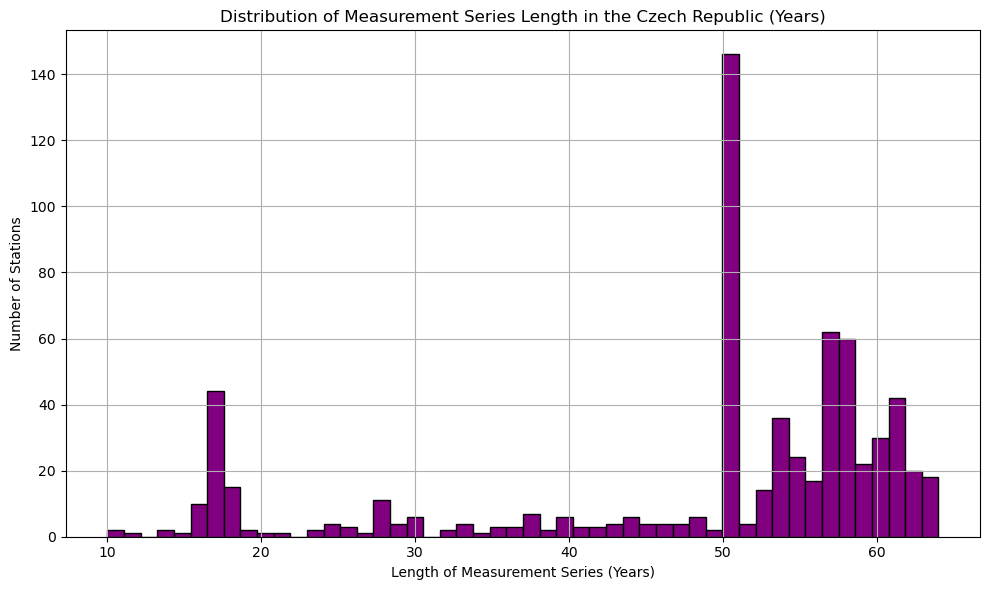

In [14]:
# Histogram showing the distribution of measurement series length in the Czech Republic
# This plot provides insights into how long monitoring data has been collected at stations in the Czech Republic.
plt.figure(figsize=(10, 6))
df_cz['length_years'].dropna().hist(bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Measurement Series Length in the Czech Republic (Years)")
plt.xlabel("Length of Measurement Series (Years)")
plt.ylabel("Number of Stations")
plt.tight_layout()
plt.show()

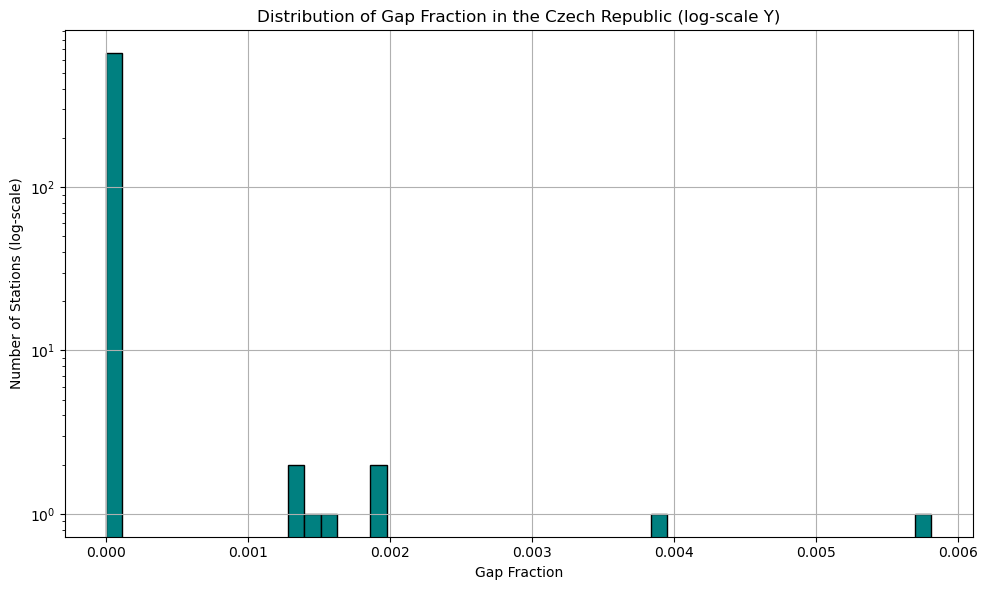

In [15]:
# Histogram showing the distribution of gap fraction in the Czech Republic (with log-scale y-axis)
# This plot helps to understand the completeness of data, with a log scale to emphasize the frequency of low gap fractions.
plt.figure(figsize=(10, 6))
df_cz['gap_fraction'].dropna().hist(bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Gap Fraction in the Czech Republic (log-scale Y)")
plt.xlabel("Gap Fraction")
plt.ylabel("Number of Stations (log-scale)")
plt.yscale('log') # Use log scale for y-axis to better visualize the distribution of lower gap fractions
plt.tight_layout()
plt.show()

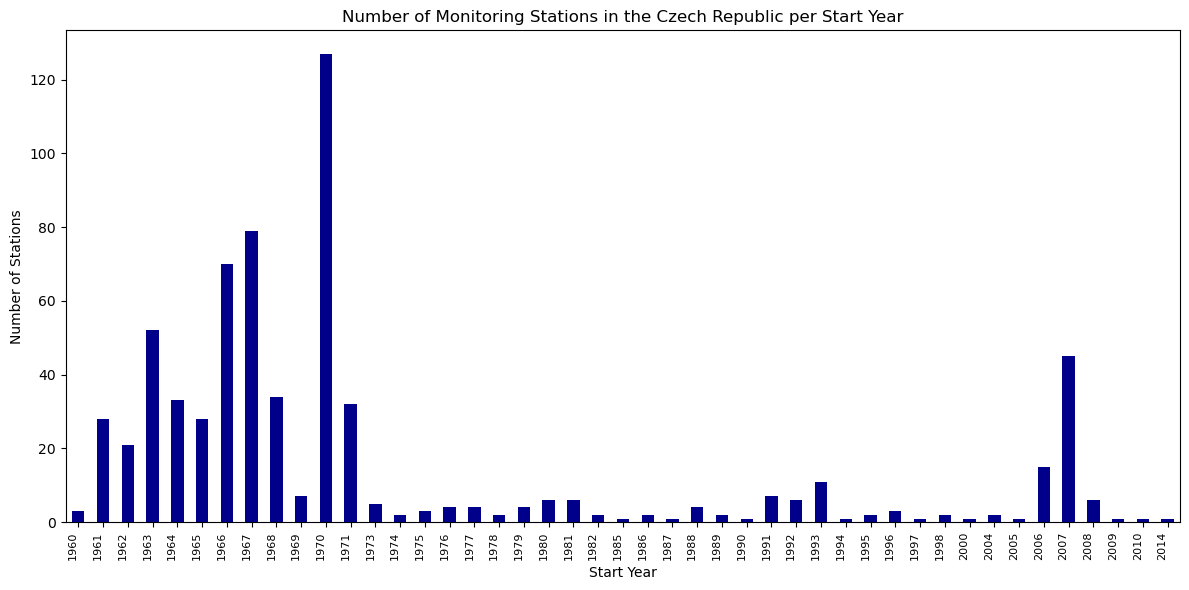

In [16]:
# Bar plot showing the number of monitoring stations in the Czech Republic per start year
# This plot illustrates the temporal evolution of the monitoring network in the Czech Republic, showing when most stations were established.
plt.figure(figsize=(12, 6))
df_cz['starting_year'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title("Number of Monitoring Stations in the Czech Republic per Start Year")
plt.xlabel("Start Year")
plt.ylabel("Number of Stations")
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

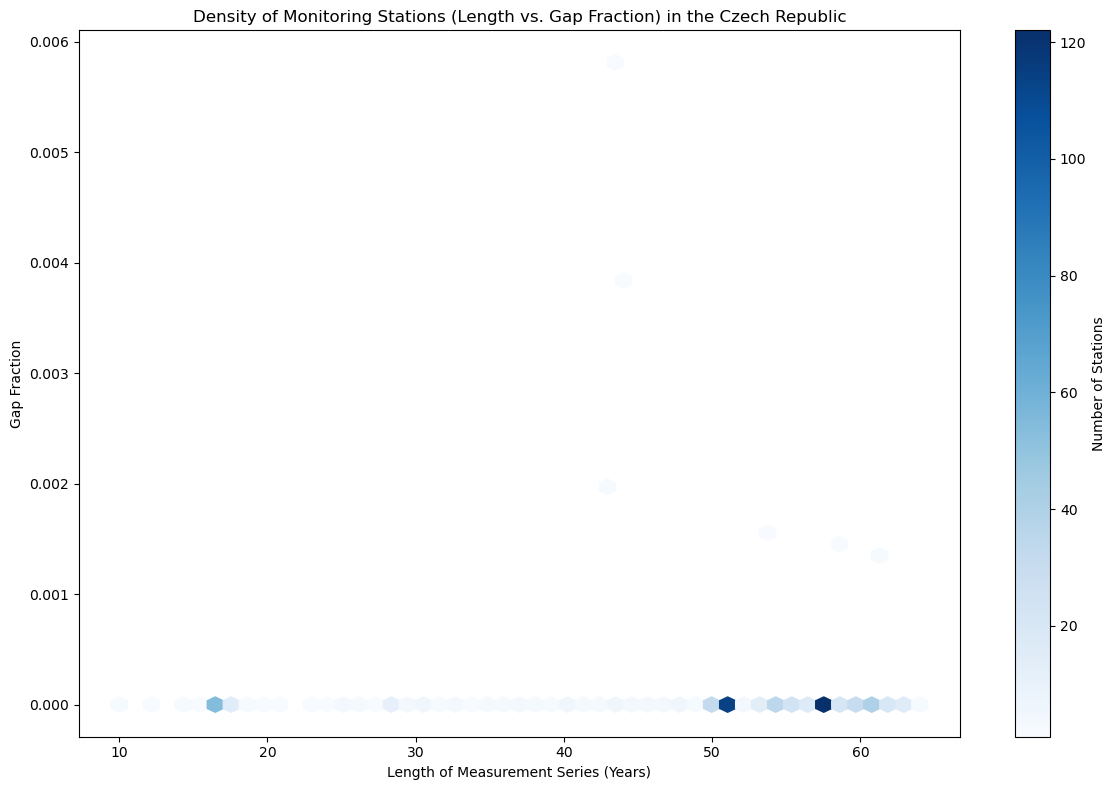

In [17]:
# Hexbin plot showing the density of monitoring stations based on length and gap fraction in the Czech Republic
# This plot reveals clusters of stations based on how long they've been recording and how complete their data is.
plt.figure(figsize=(12, 8))
plt.hexbin(df_cz['length_years'], df_cz['gap_fraction'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Stations')
plt.title("Density of Monitoring Stations (Length vs. Gap Fraction) in the Czech Republic")
plt.xlabel("Length of Measurement Series (Years)")
plt.ylabel("Gap Fraction")
plt.tight_layout()
plt.show()

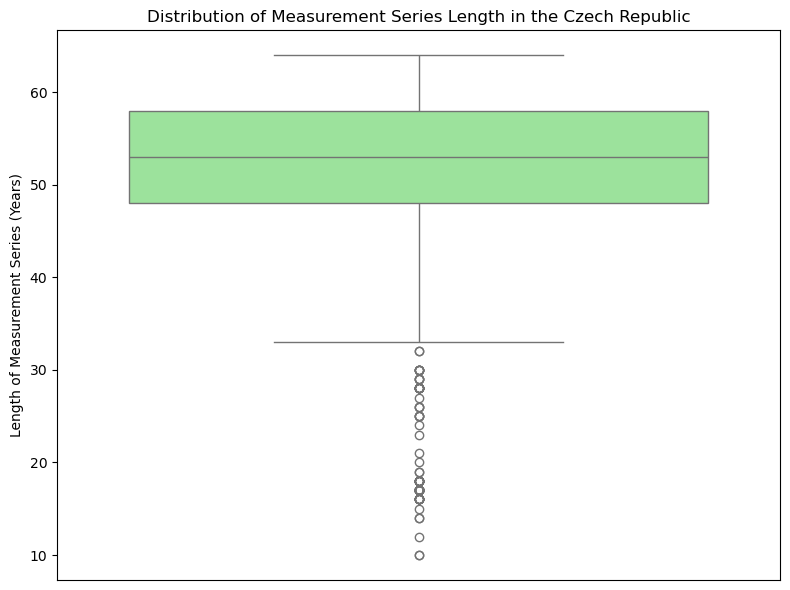

In [18]:
# Box plot showing the distribution of measurement series length in the Czech Republic
# Provides a concise summary of the central tendency and spread of measurement series lengths, and identifies outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cz['length_years'].dropna(), color='lightgreen')
plt.title("Distribution of Measurement Series Length in the Czech Republic")
plt.ylabel("Length of Measurement Series (Years)")
plt.xticks([]) # Remove x-axis ticks as it's a single box plot
plt.tight_layout()
plt.show()

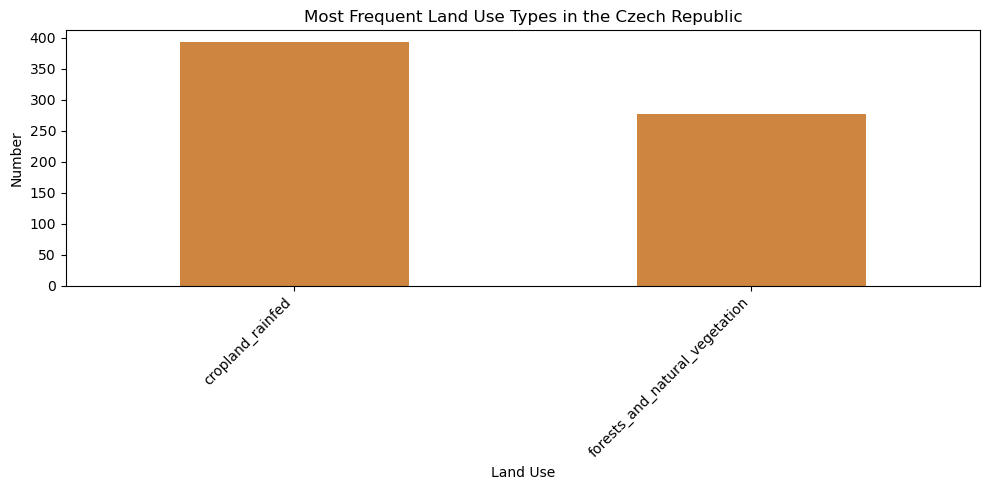

In [19]:
# Bar plot showing the most frequent land use types in the Czech Republic
# This plot highlights the common land use categories around monitoring stations specifically in the Czech Republic.
if 'main_landuse' in df_cz.columns and not df_cz['main_landuse'].dropna().empty:
    plt.figure(figsize=(10, 5))
    df_cz['main_landuse'].value_counts().head(10).plot(kind='bar', color='peru')
    plt.title("Most Frequent Land Use Types in the Czech Republic")
    plt.xlabel("Land Use")
    plt.ylabel("Number")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'main_landuse' is not present or empty for the Czech Republic. Skipping plot.")

In [20]:
# Histogram showing the distribution of surface elevation of monitoring stations in the Czech Republic
# This histogram provides insight into the typical altitudes of groundwater monitoring points within the Czech Republic.
if 'surface_elevation_m_asl' in df_cz.columns and not df_cz['surface_elevation_m_asl'].dropna().empty:
    plt.figure(figsize=(10, 6))
    df_cz['surface_elevation_m_asl'].dropna().hist(bins=50, color='olive', edgecolor='black')
    plt.title("Distribution of Surface Elevation of Monitoring Stations in the Czech Republic")
    plt.xlabel("Elevation (m a.s.l.)")
    plt.ylabel("Number")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'surface_elevation_m_asl' is not present or empty for the Czech Republic. Skipping plot.")

Column 'surface_elevation_m_asl' is not present or empty for the Czech Republic. Skipping plot.


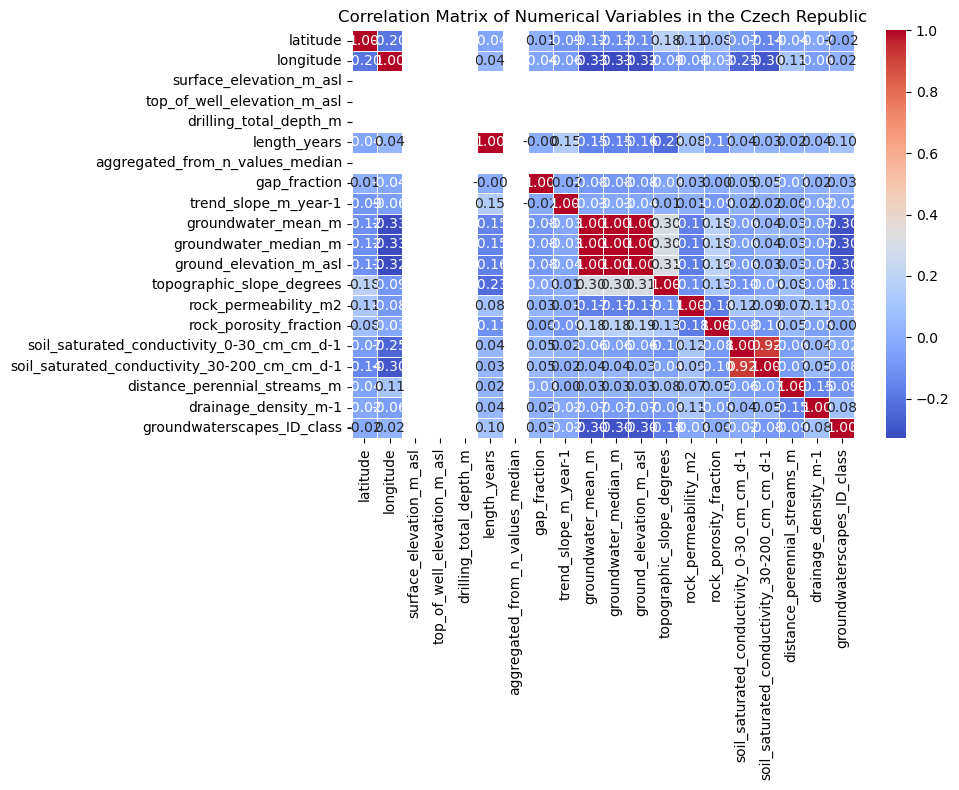

In [21]:
# Heatmap showing the correlation matrix of numerical variables in the Czech Republic
# This heatmap visualizes the linear relationships between different numerical attributes for stations in the Czech Republic.
numeric_cols_cz = df_cz.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols_cz) > 1:
    corr_cz = df_cz[numeric_cols_cz].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_cz, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Correlation Matrix of Numerical Variables in the Czech Republic")
    plt.tight_layout()
    plt.show()
elif len(numeric_cols_cz) <= 1:
    print("Not enough numerical columns for a correlation matrix in the Czech Republic (at least 2 needed). Skipping plot.")
else:
    print("No numerical columns found for a correlation matrix in the Czech Republic. Skipping plot.")


Further detailed plots for Czech Republic (CZE) data:

Missing values for Czech Republic (CZE) data:
GROW_ID                                           0
original_ID_groundwater                           0
name                                              0
feature_type                                      0
purpose                                           0
status                                            0
description                                     669
latitude                                          0
longitude                                         0
surface_elevation_m_asl                         669
top_of_well_elevation_m_asl                     669
country                                           0
address                                         669
license                                           0
aquifer_name                                    669
confinement                                     669
organisation                                      0
manager       

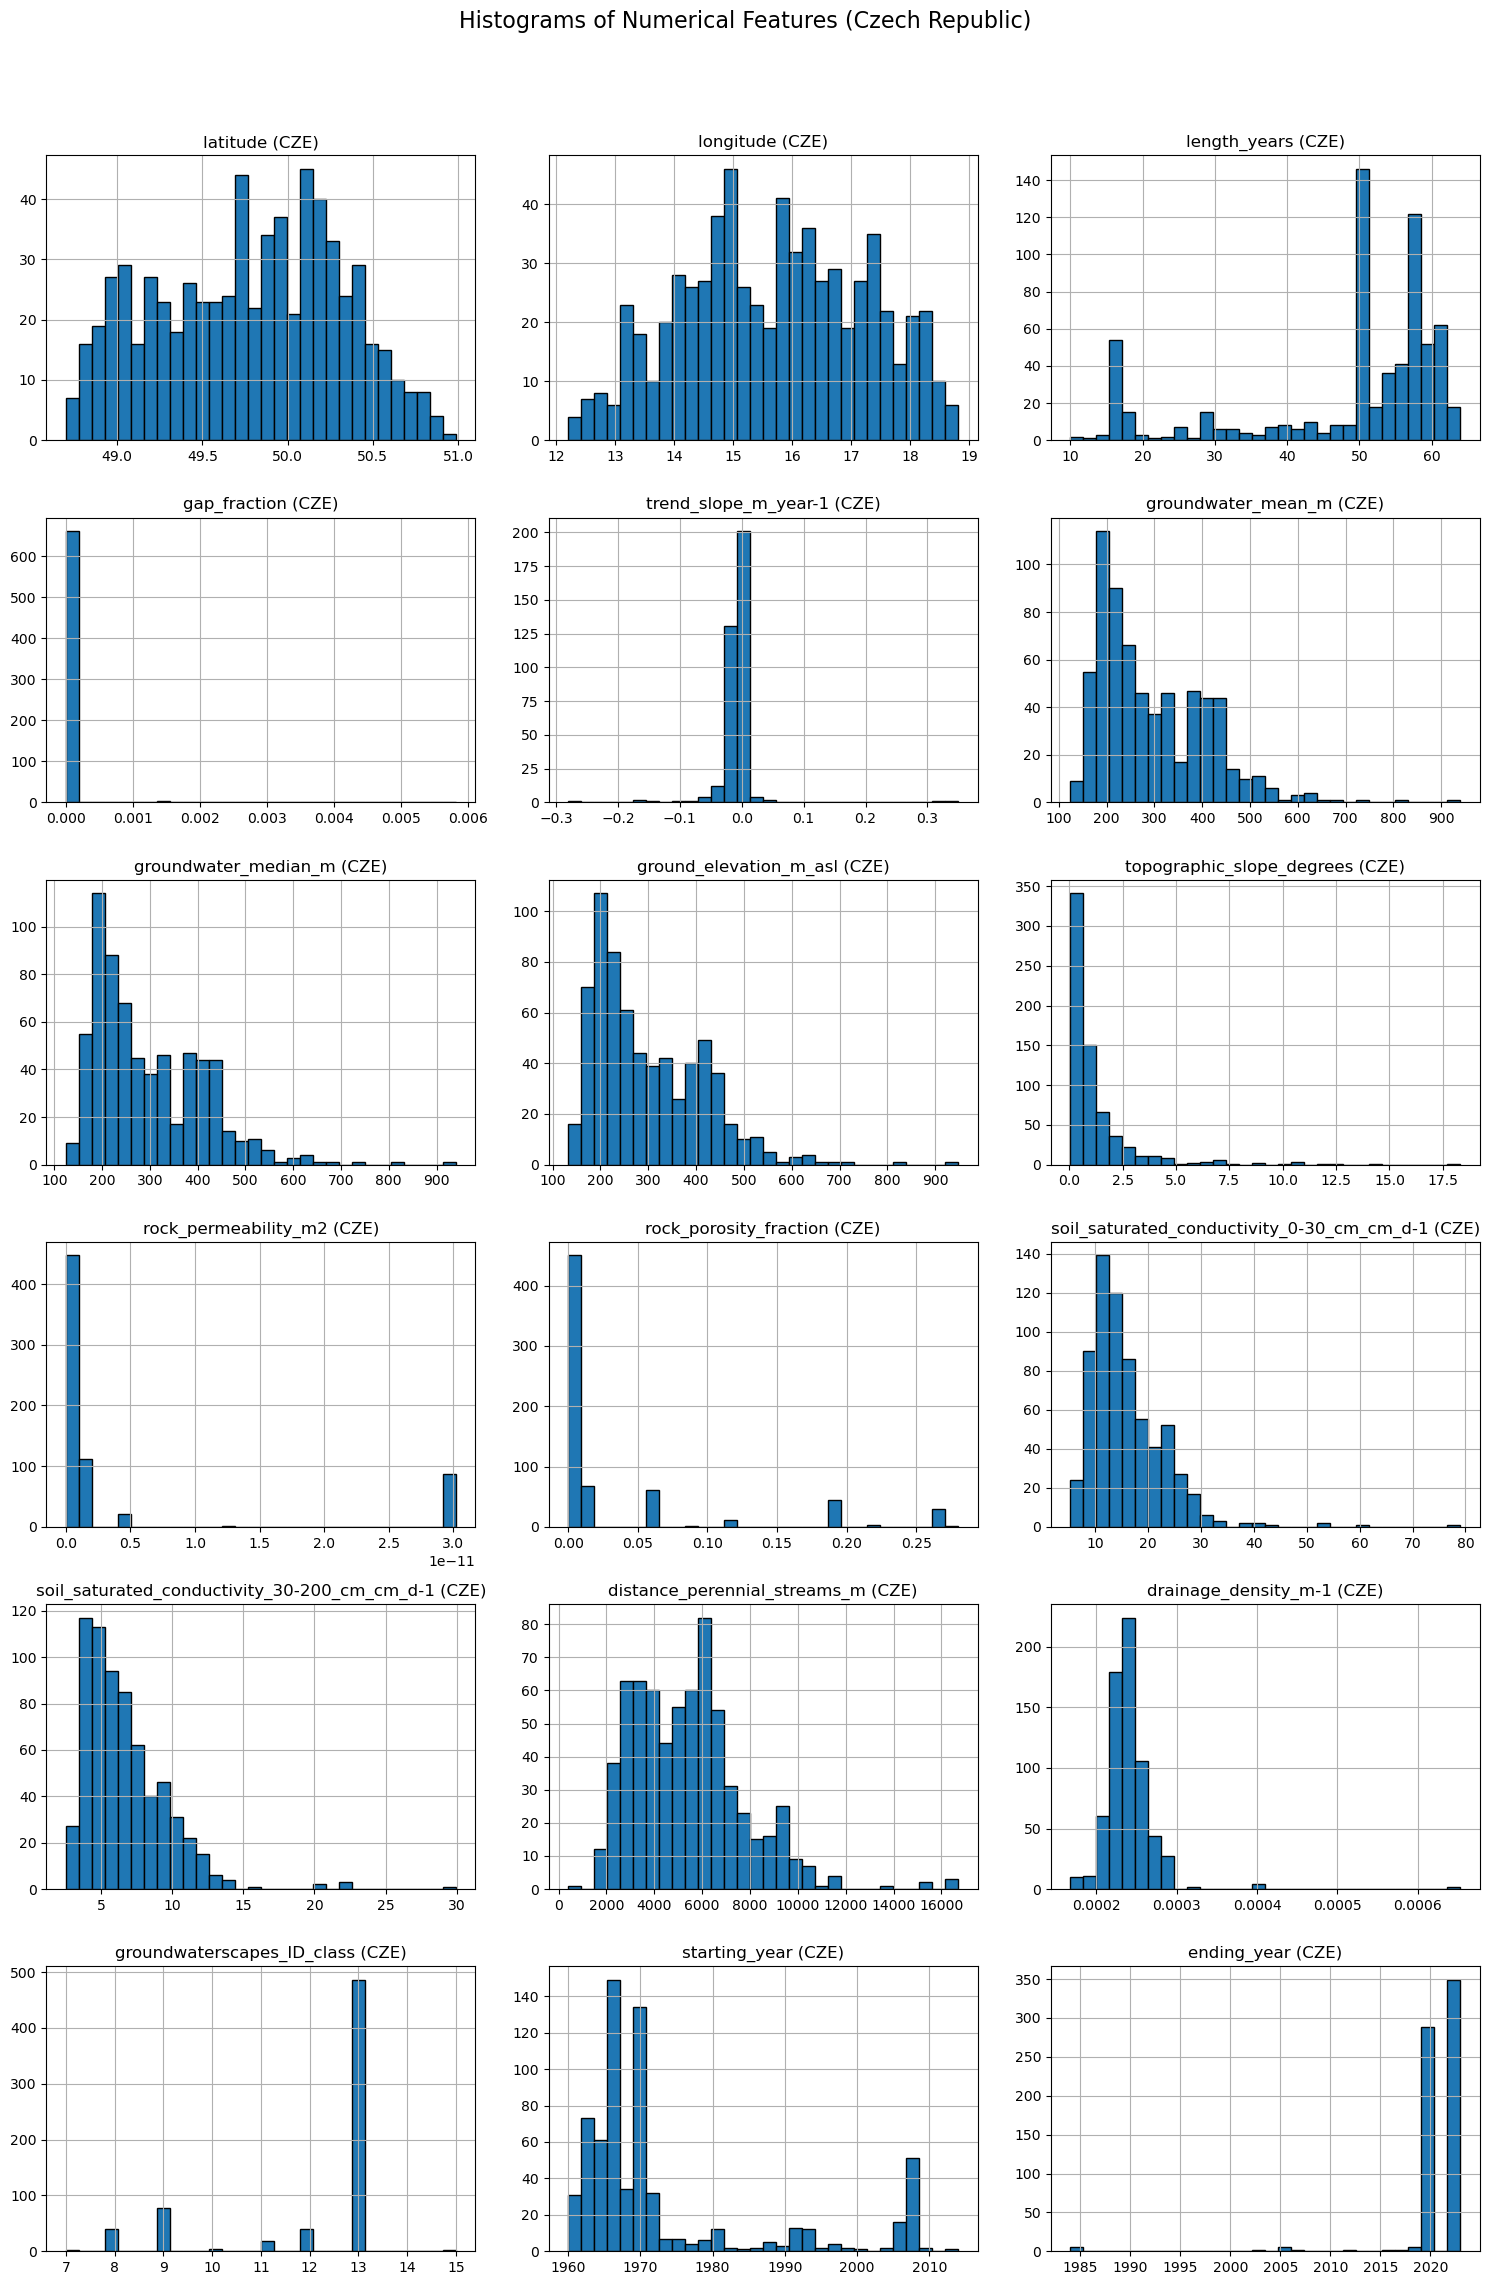

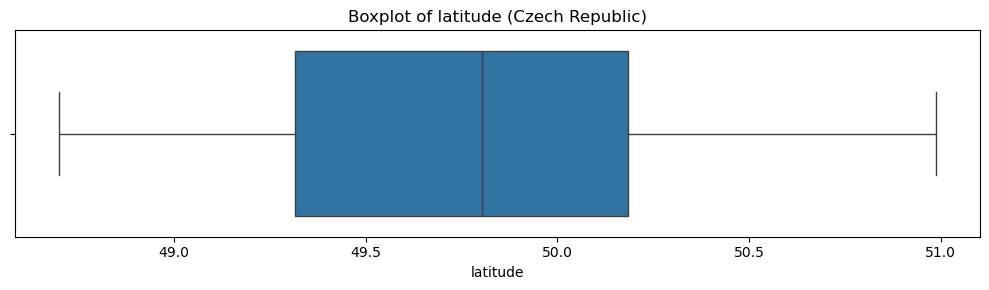

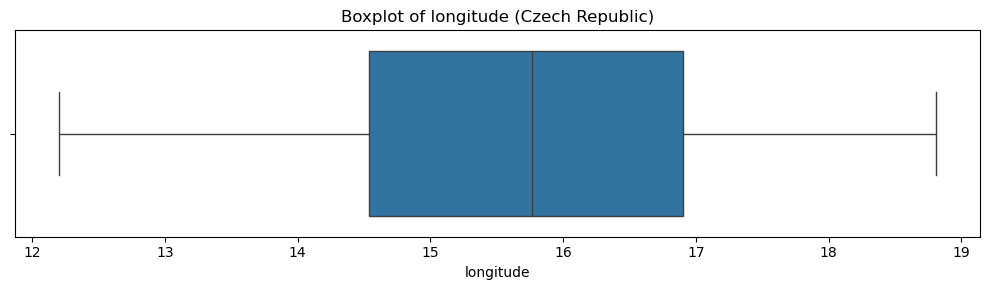

Skipping Boxplot for 'surface_elevation_m_asl' (Czech Republic): Not enough diverse or no non-missing values.
Skipping Boxplot for 'top_of_well_elevation_m_asl' (Czech Republic): Not enough diverse or no non-missing values.
Skipping Boxplot for 'drilling_total_depth_m' (Czech Republic): Not enough diverse or no non-missing values.


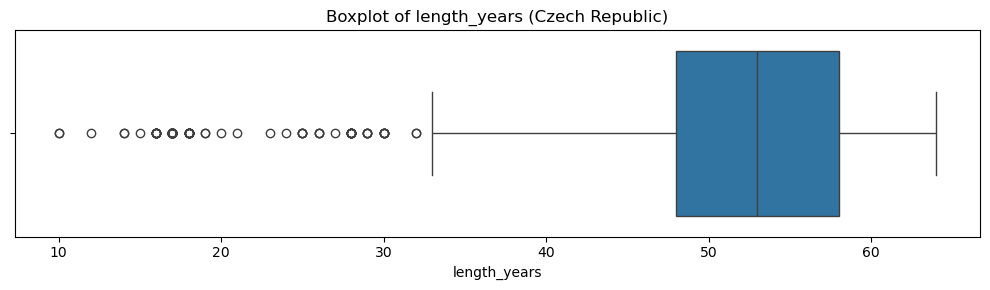

Skipping Boxplot for 'aggregated_from_n_values_median' (Czech Republic): Not enough diverse or no non-missing values.


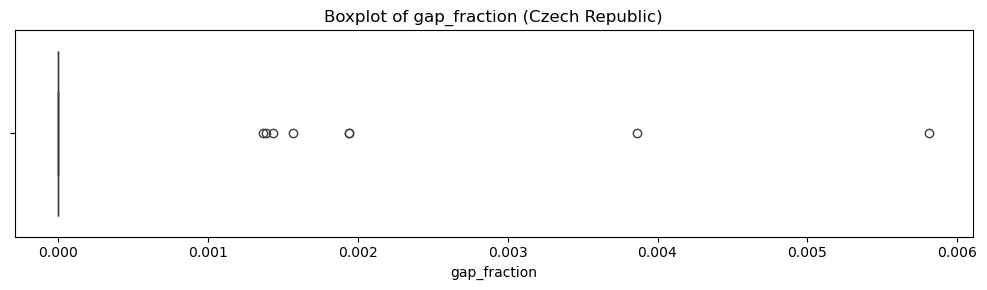

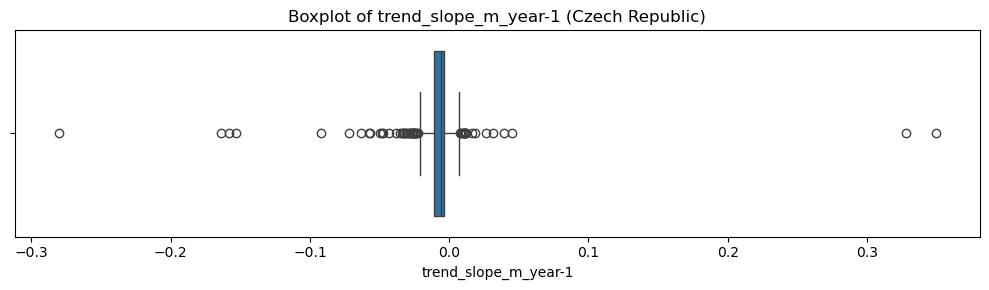

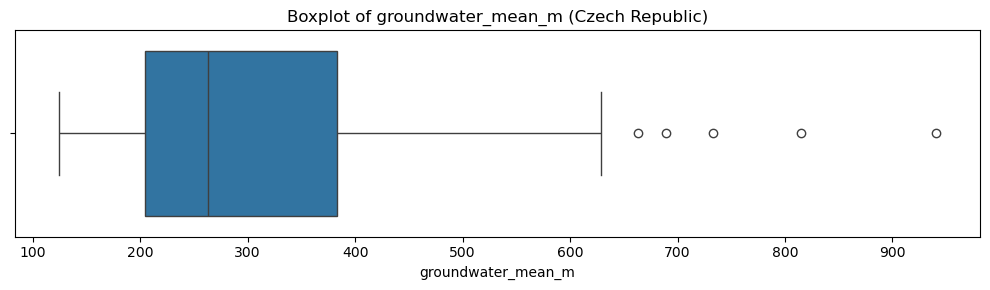

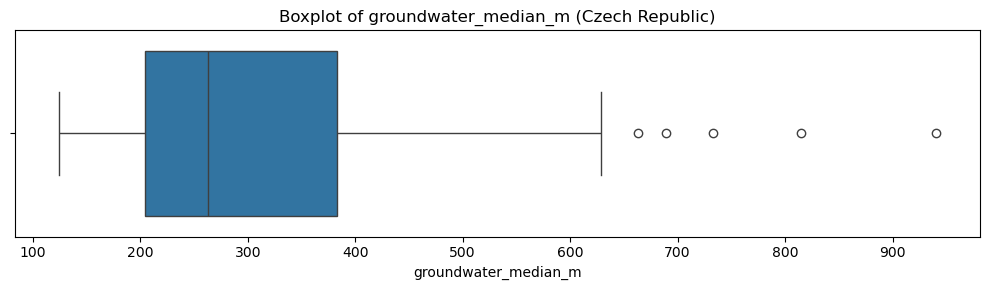

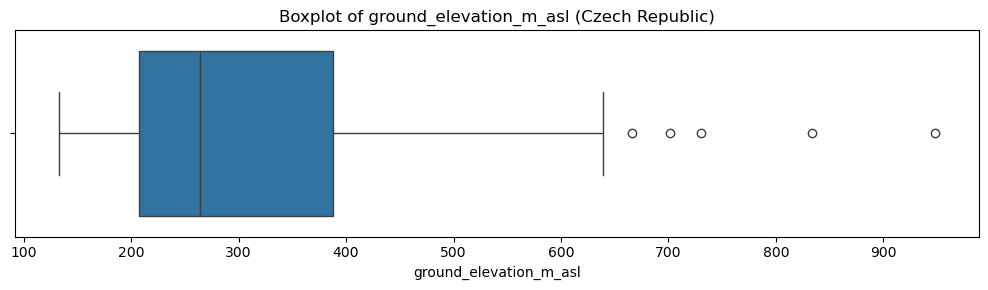

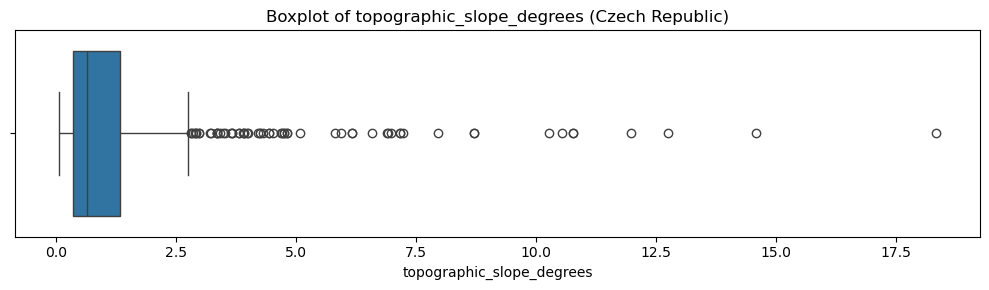

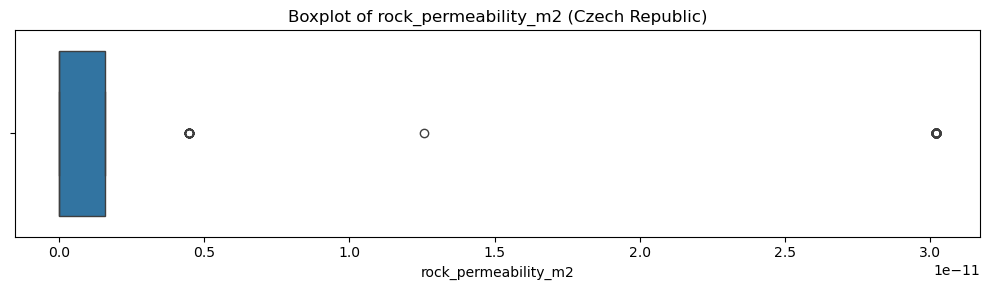

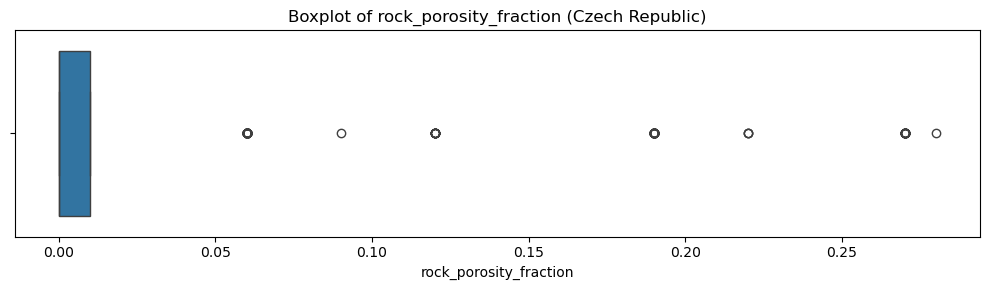

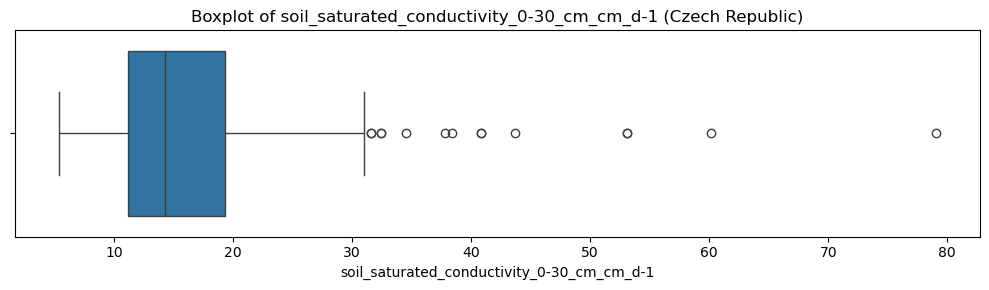

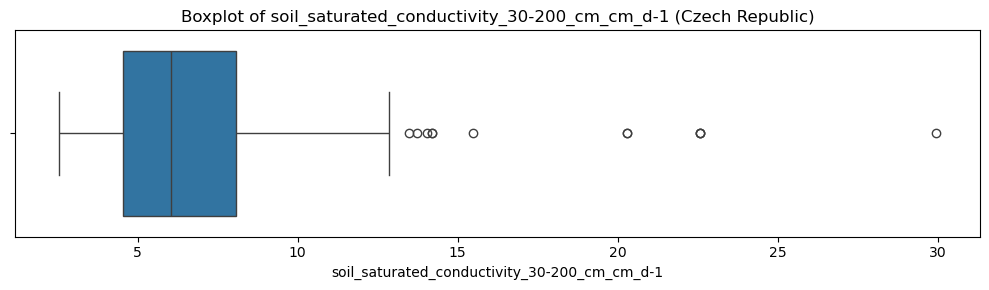

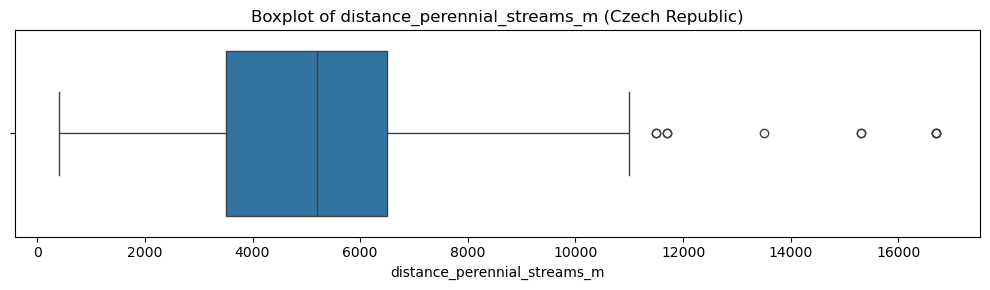

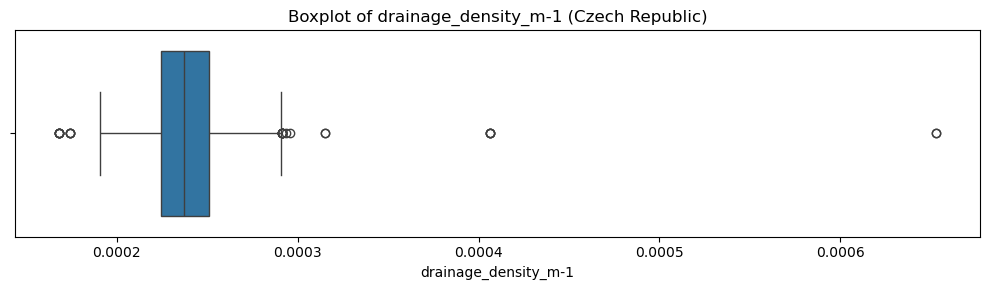

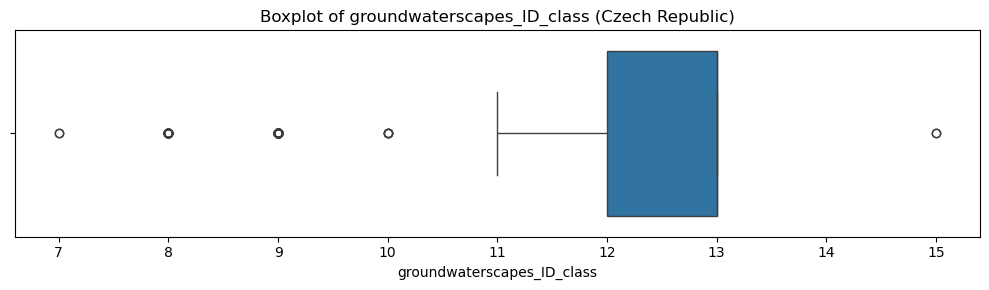

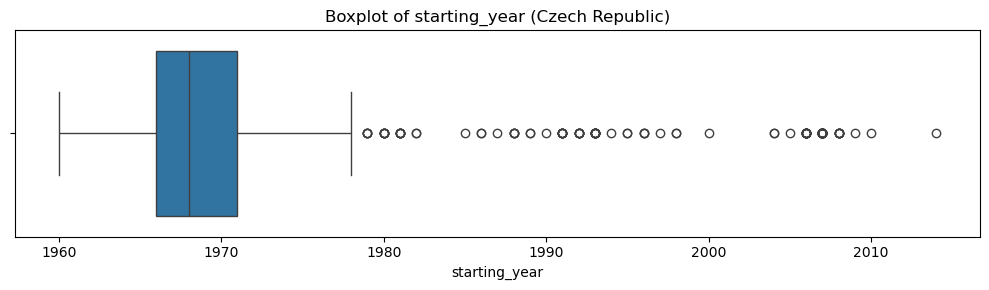

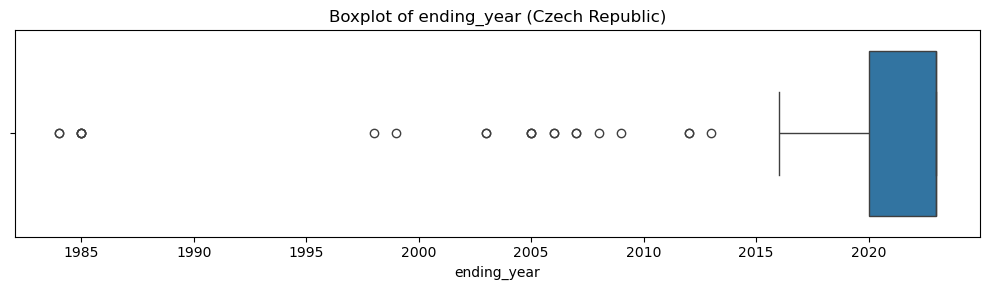

Column 'GROW_ID' in CZE data has too many unique values (187317) for a bar chart after reindexing. Skipping bar chart.
Column 'original_ID_groundwater' in CZE data has too many unique values (187156) for a bar chart after reindexing. Skipping bar chart.
Column 'name' in CZE data has too many unique values (177739) for a bar chart after reindexing. Skipping bar chart.


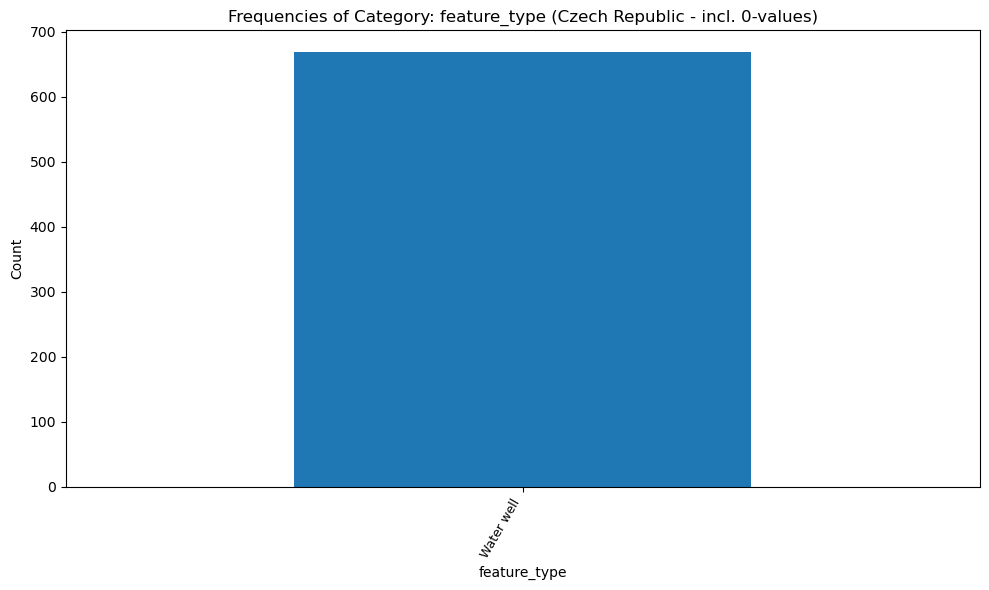

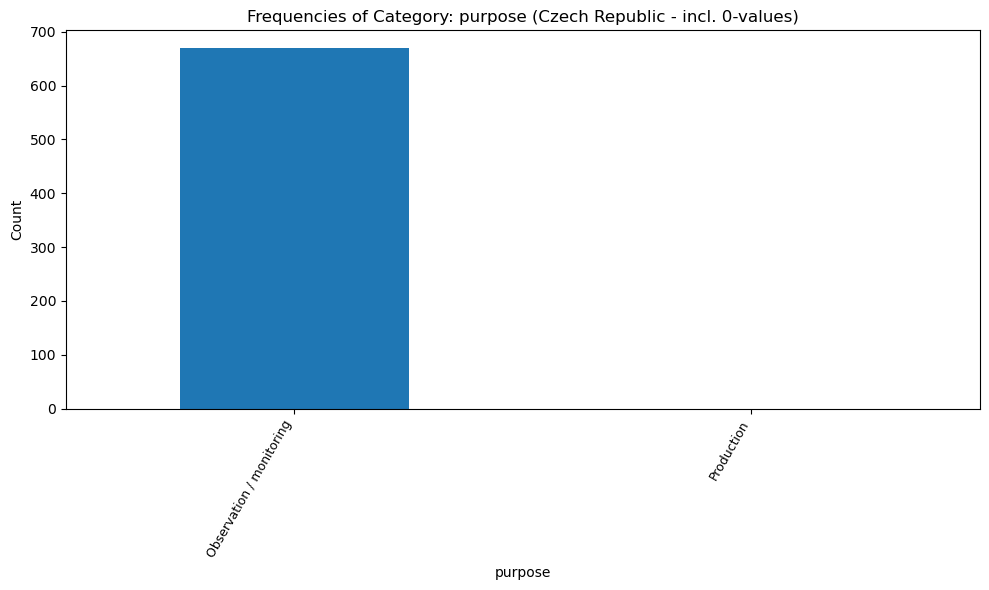

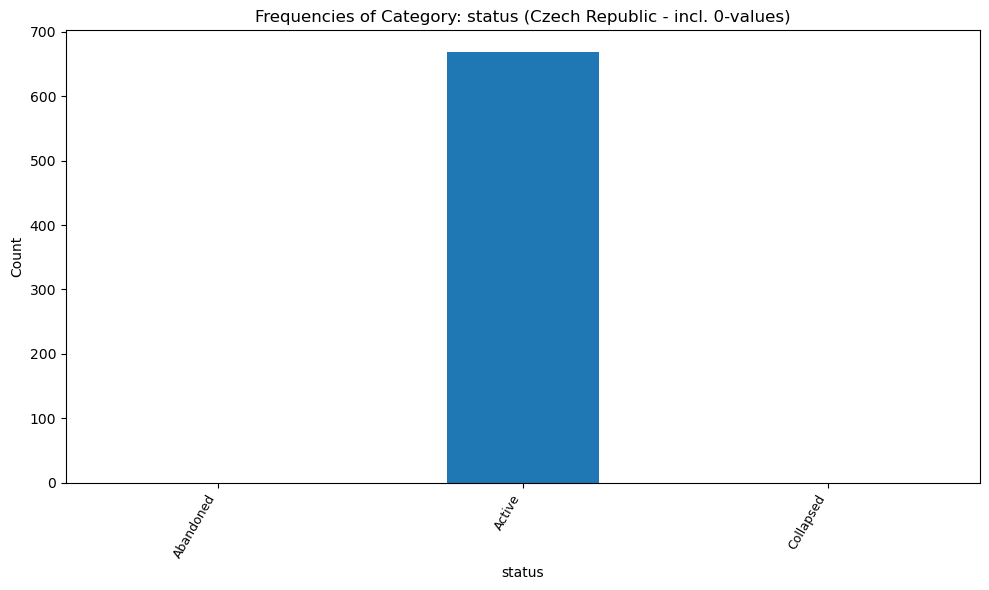

Column 'description' in CZE data has too many unique values (11234) for a bar chart after reindexing. Skipping bar chart.
Column 'country' in CZE data has too many unique values (41) for a bar chart after reindexing. Skipping bar chart.
Column 'address' in CZE data has too many unique values (1037) for a bar chart after reindexing. Skipping bar chart.


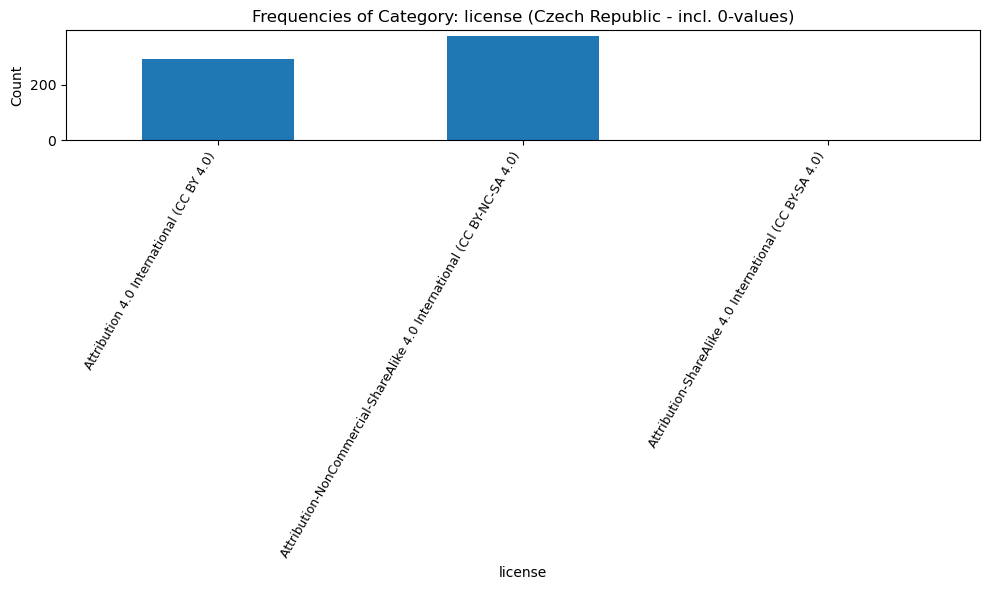

Column 'aquifer_name' in CZE data has too many unique values (968) for a bar chart after reindexing. Skipping bar chart.


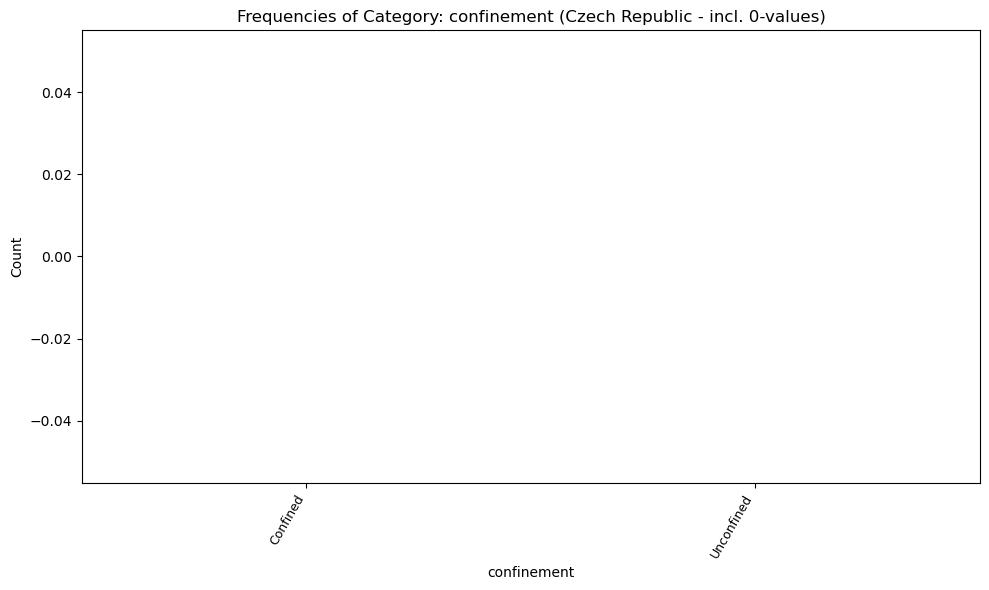

Column 'organisation' in CZE data has too many unique values (48) for a bar chart after reindexing. Skipping bar chart.
Column 'manager' in CZE data has too many unique values (51) for a bar chart after reindexing. Skipping bar chart.


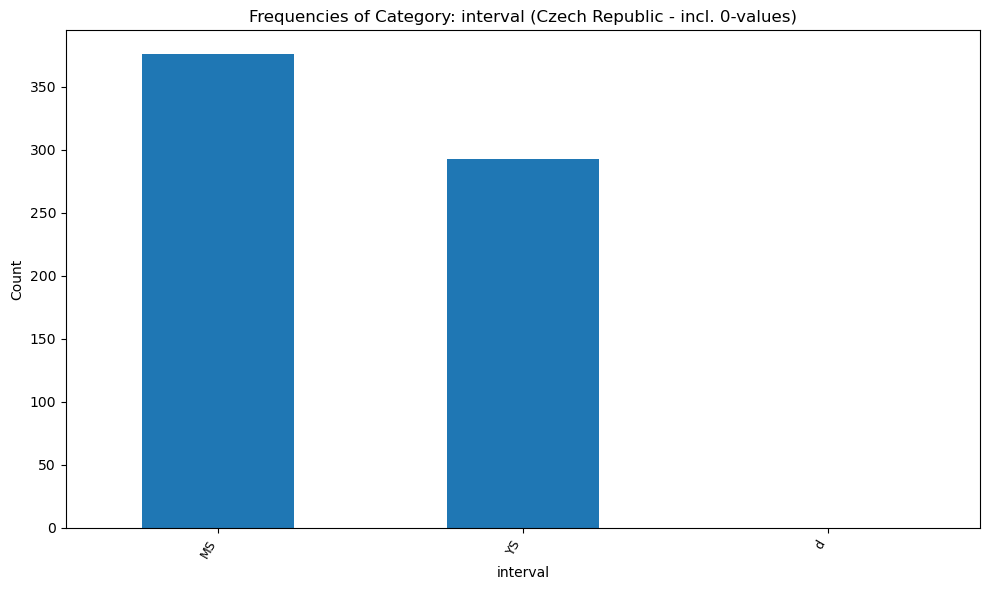

Column 'starting_date' in CZE data has too many unique values (6005) for a bar chart after reindexing. Skipping bar chart.
Column 'ending_date' in CZE data has too many unique values (4884) for a bar chart after reindexing. Skipping bar chart.


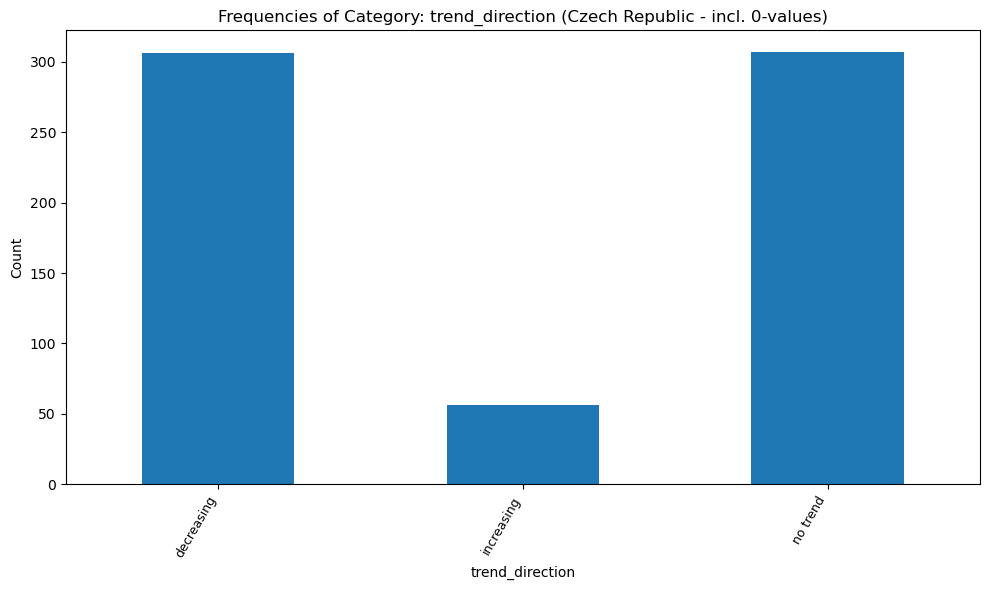

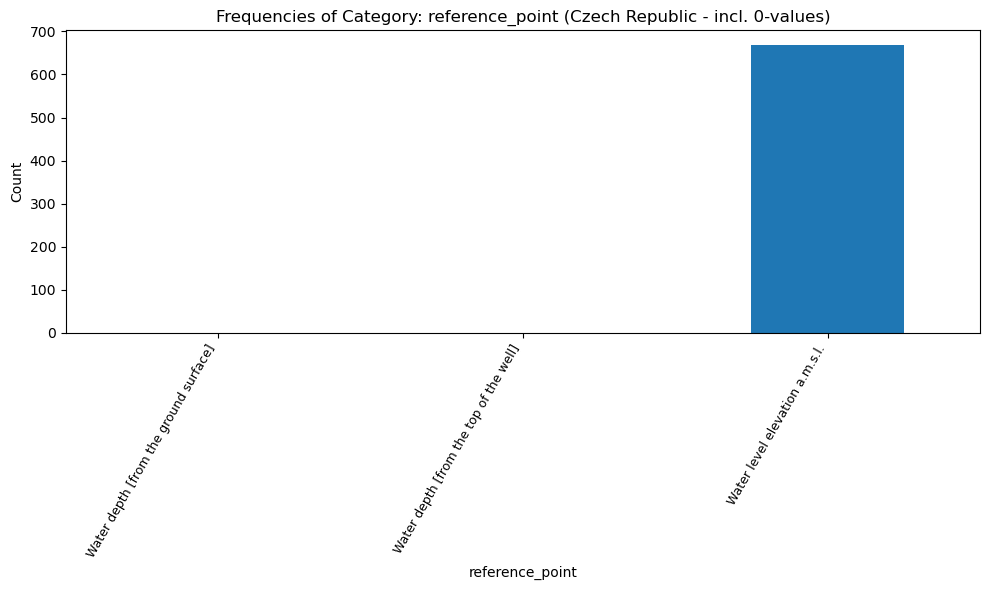

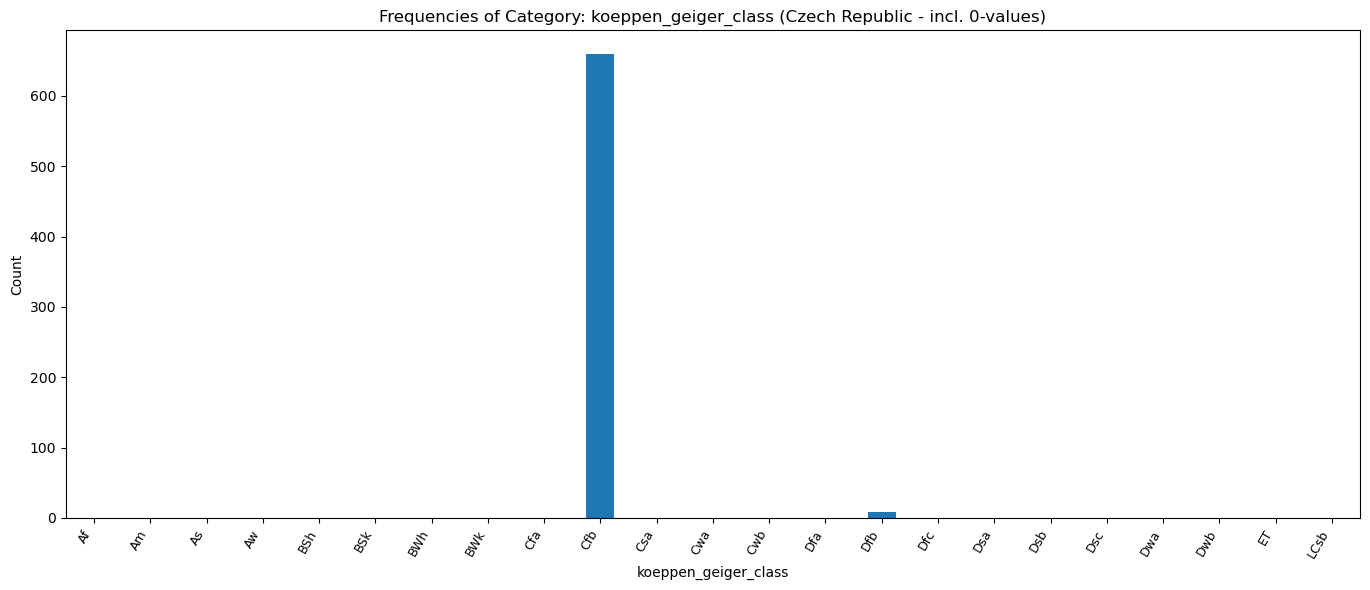

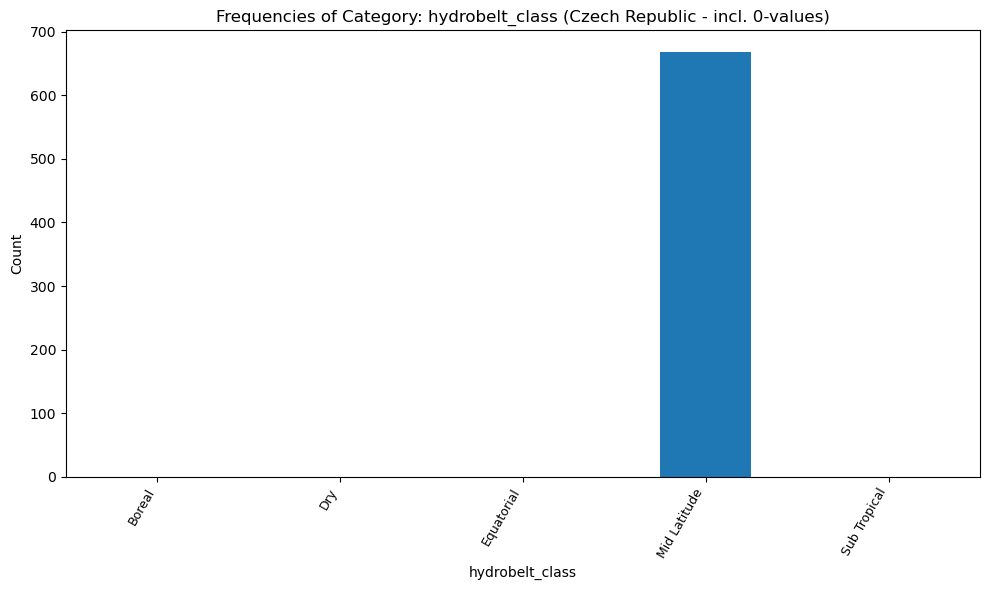

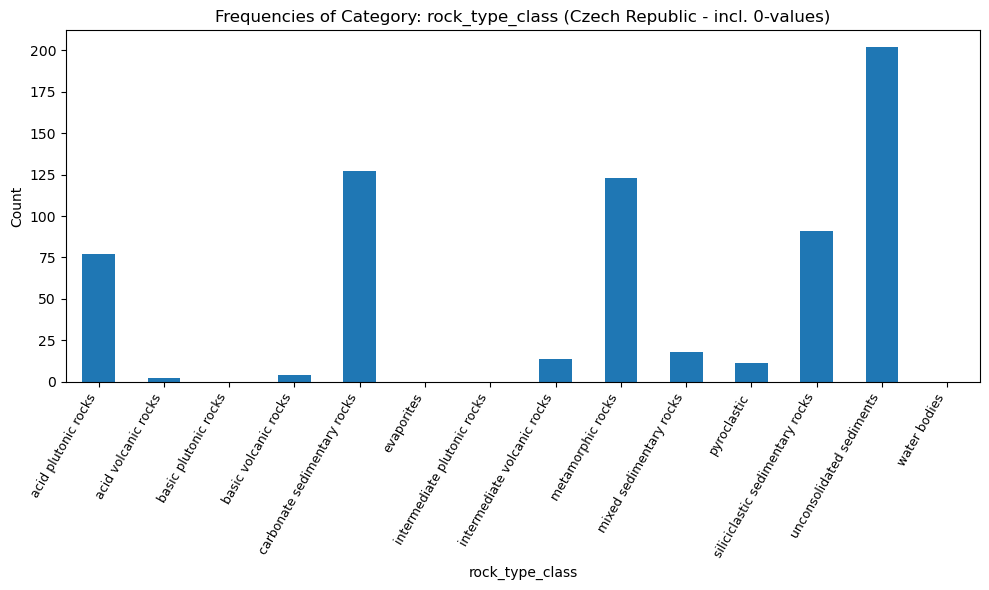

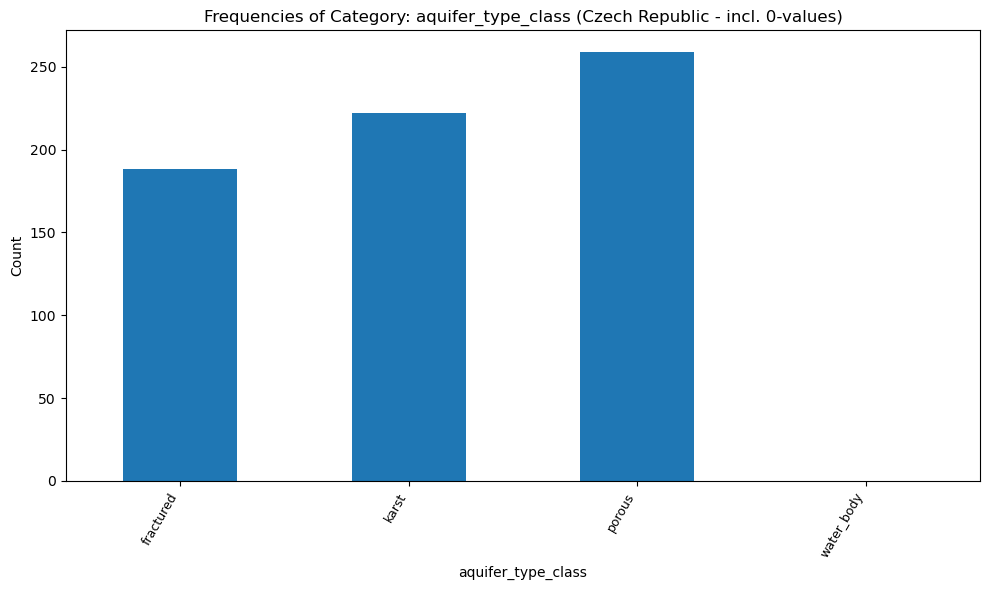

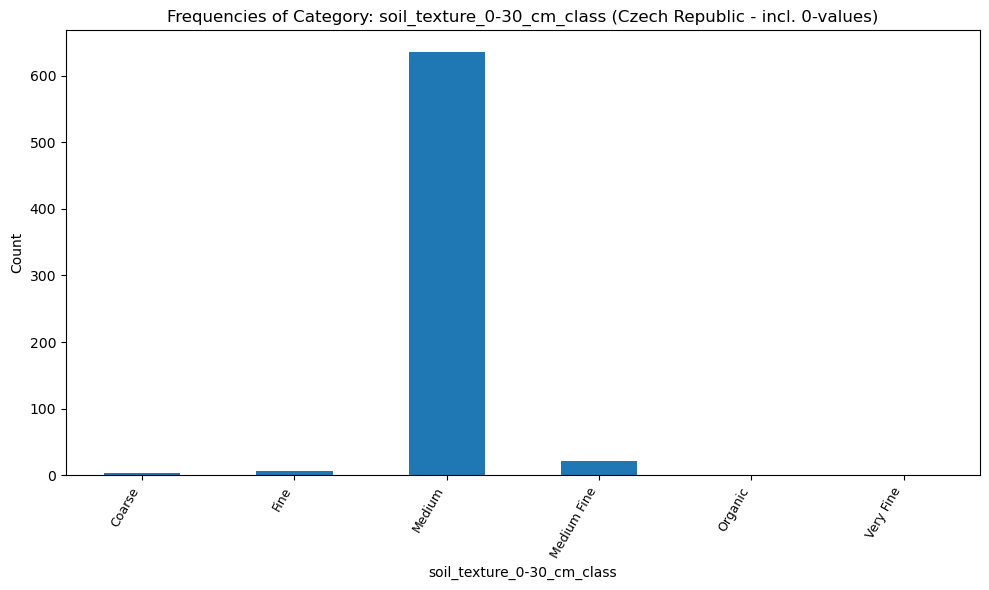

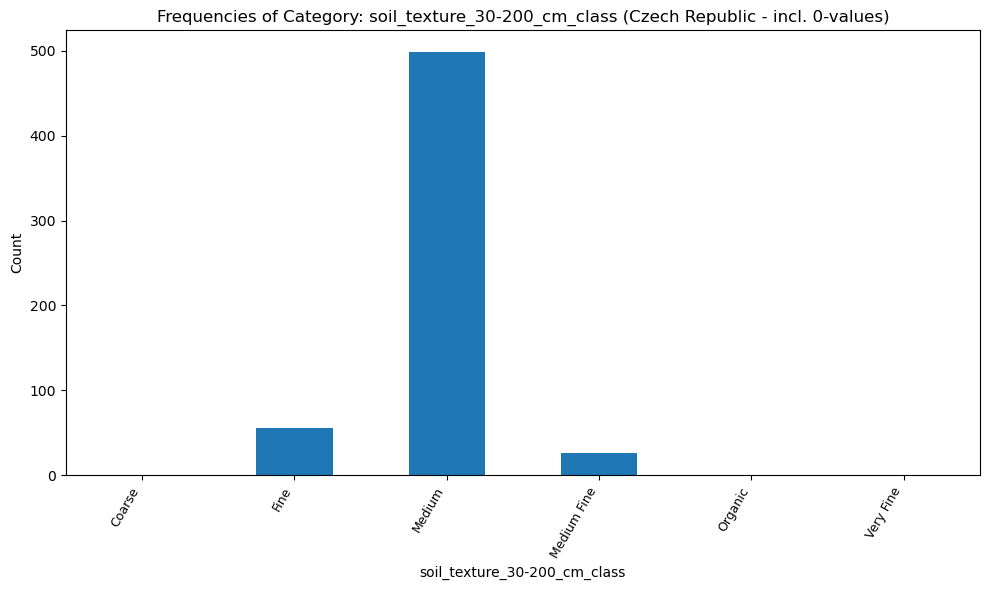

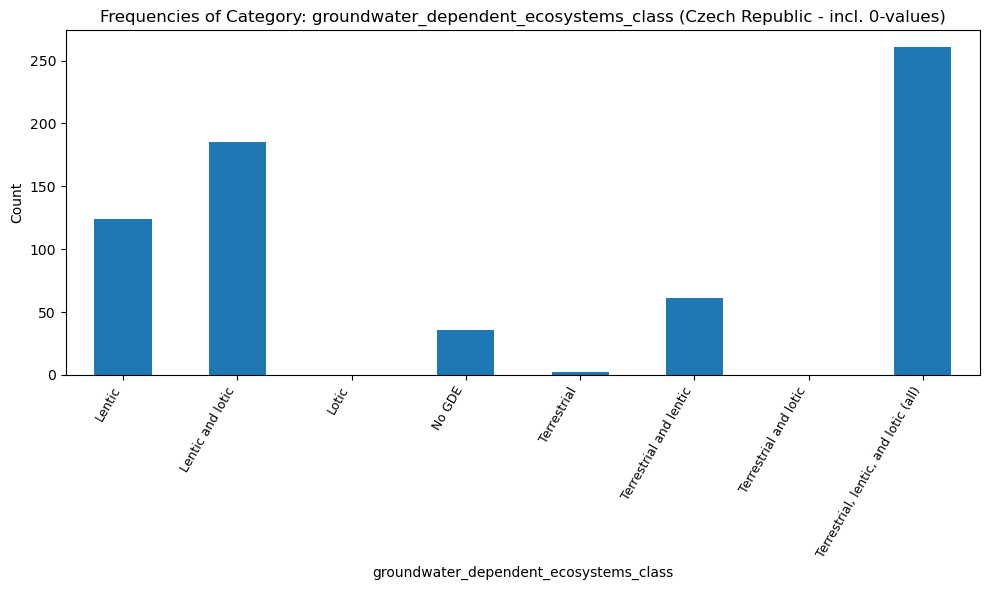

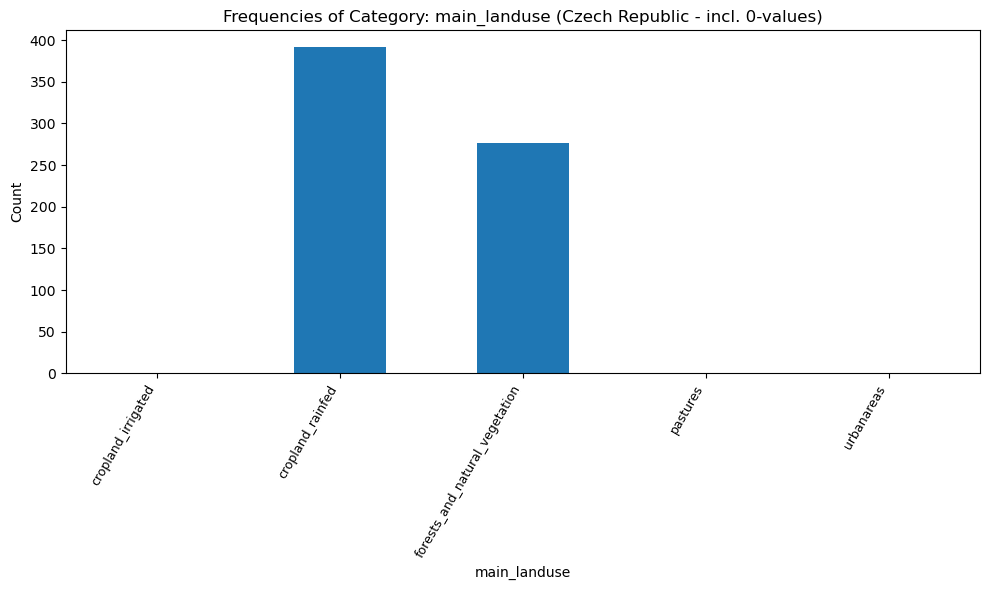

In [ ]:
# Additional general histograms and boxplots for CZE data (from original Ploties.py for detailed EDA)

print("\nFurther detailed plots for Czech Republic (CZE) data:")

# Overview: Missing values for CZE data
print("\nMissing values for Czech Republic (CZE) data:")
print(df_cz.isnull().sum())

# Histograms of numerical features for CZE
# This provides individual histograms for all relevant numerical columns, useful for understanding their distributions.
numeric_cols_cz_detailed = df_cz.select_dtypes(include='number').columns
if not numeric_cols_cz_detailed.empty:
    numeric_cols_with_data = [col for col in numeric_cols_cz_detailed if df_cz[col].dropna().nunique() > 1]
    
    if numeric_cols_with_data:
        # Determine number of rows/columns for subplots
        n_plots = len(numeric_cols_with_data)
        n_cols = 3 # You can adjust this for more columns
        n_rows = (n_plots + n_cols - 1) // n_cols # Calculate rows needed
        
        fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
        axes_hist = axes_hist.flatten() # Flatten for easy iteration

        for i, col in enumerate(numeric_cols_with_data):
            df_cz[col].dropna().hist(bins=30, ax=axes_hist[i], edgecolor='black')
            axes_hist[i].set_title(f'{col} (CZE)')
            axes_hist[i].set_xlabel('') # Clear x-label to prevent overlap in subplots
            axes_hist[i].set_ylabel('') # Clear y-label
            
        # Hide any unused subplots
        for j in range(i + 1, len(axes_hist)):
            fig_hist.delaxes(axes_hist[j])

        plt.suptitle("Histograms of Numerical Features (Czech Republic)", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
        plt.show()
    else:
        print("Not enough diverse numerical columns for histograms in CZE data found.")
else:
    print("No numerical columns for histograms in CZE data found.")

# Boxplots for outlier detection for CZE
# These boxplots help to visually identify potential outliers and the distribution of individual numerical features.
if not numeric_cols_cz_detailed.empty:
    for col in numeric_cols_cz_detailed:
        if df_cz[col].dropna().nunique() > 1:
            plt.figure(figsize=(10, 3)) # Slightly wider and taller for boxplots
            sns.boxplot(x=df_cz[col].dropna())
            plt.title(f'Boxplot of {col} (Czech Republic)')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping Boxplot for '{col}' (Czech Republic): Not enough diverse or no non-missing values.")
else:
    print("No numerical columns for boxplots in CZE data found.")

# Bar charts for categorical features for CZE
# These plots show the frequency distribution of categorical attributes for stations in the Czech Republic.
categorical_cols_cz = df_cz.select_dtypes(include='object').columns
if not categorical_cols_cz.empty:
    for col in categorical_cols_cz:
        # Get value counts for Czech Republic data
        cz_value_counts = df_cz[col].value_counts()
        
        if cz_value_counts.empty:
            print(f"Column '{col}' in CZE data is empty after dropping NA. Skipping bar chart.")
            continue

        # Check if the number of categories is reasonable for a bar chart
        if len(cz_value_counts) < 35: # Plot all if less than 35 unique values
            plot_data = cz_value_counts
            title_suffix = ""
            print(f"Plotting all {len(cz_value_counts)} unique values for '{col}' in CZE data.")
        else: # If 35 or more unique values, plot top 10
            plot_data = cz_value_counts.head(10)
            title_suffix = " (Top 10 Categories)"
            print(f"Column '{col}' in CZE data has too many unique values ({len(cz_value_counts)}). Plotting top 10 most frequent categories.")

        fig_width = max(10, len(plot_data) * 0.6) # Dynamic width based on number of categories
        plt.figure(figsize=(fig_width, 6))

        plot_data.plot(kind='bar')
        plt.title(f'Frequencies of Category: {col} (Czech Republic){title_suffix}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=60, ha='right', fontsize=9) # Rotate and adjust alignment for readability
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns for bar charts in CZE data found.")